# Carga de paquetes

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import CoolProp as cp
from CoolProp.CoolProp import PropsSI

#Automcompletar rápido
%config IPCompleter.greedy=True

# Carga de fórmulas termodinámica

In [53]:
# Cálculo de la temnperatura (ºC) conocida la presión relativa (bar) - R290
def convert_PT_R290(presion):
    temperatura = np.round(PropsSI('T', 'P', (presion+1)*100000, 'Q', 1, 'R290')-273.15,2)
    return temperatura

In [54]:
# Cálculo de la entaplía (kJ/kg), fuera de campana saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entalpia_R290_PT(presion, temperatura):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000,2)
    return entalpia

In [55]:
# Cálculo de la entropia (kJ/kgK), fuera de campana saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entropia_R290_PT(presion, temperatura):
    entropia = PropsSI('S', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000
    return entropia

In [56]:
# Cálculo de la entaplía (kJ/kg), en campana saturación, conocida la presión relativa (bar) y el título de vapor (0 a 1) - R290
def entalpia_R290_PQ(presion, tit_vapor):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'Q', tit_vapor, 'R290')/1000,2)
    return entalpia

In [57]:
# Cálculo de la entropia (kJ/kgK), en campana saturación, conocida la presión relativa (bar) y el título de vapor (0 a 1) - R290
def entropia_R290_PQ(presion, tit_vapor):
    entropia = PropsSI('S', 'P', (presion+1)*100000, 'Q', tit_vapor, 'R290')/1000
    return entropia

In [58]:
# Cálculo de la entaplía (kJ/kg) en campana saturación conocida la temperatura (ºC) y el título de vapor (0 a 1) - R290
def entalpia_R290_TQ(temperatura, tit_vapor):
    entalpia = np.round(PropsSI('H', 'T', temperatura+273.15, 'Q', tit_vapor, 'R290')/1000,2)
    return entalpia

In [59]:
# Cálculo de la entropía (kJ/kgK) en campana saturación conocida la temperatura (ºC) y el título de vapor (0 a 1) - R290
def entropia_R290_TQ(temperatura, tit_vapor):
    entropia = PropsSI('S', 'T', temperatura+273.15, 'Q', tit_vapor, 'R290')/1000
    return entropia

In [60]:
# Cálculo de la entalpía (kJ/kg) fuera de campana saturación, conocidas la presión relativa (bar) y la entropía (kJ/kgK) - R290
def entalpia_R290_PS(presion, entropia):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'S', entropia*1000, 'R290')/1000,2)
    return entalpia

In [61]:
# Cálculo del COP - R290
def cop(pb, pa, t_des, t_liq, t_asp):
    h_liq = entalpia_R290_PT(pa, t_liq)
    h_asp = entalpia_R290_PT(pb, t_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    cop = np.round((h_asp-h_liq)/(h_des-h_asp),2)
    return cop

def columna_cop(df):
    h_liq = entalpia_R290_PT(df.pa, df.t_liq)
    h_asp = entalpia_R290_PT(df.pb, df.t_asp)
    h_des = entalpia_R290_PT(df.pa, df.t_des)
    columna_cop = np.round((h_asp-h_liq)/(h_des-h_asp),2)
    return columna_cop

In [62]:
# Cálculo de la eficiencia isoentrópica de compresión - R290
def ef_comp(pb, pa, t_des, t_asp):
    h_asp = entalpia_R290_PT(pb, t_asp)
    s_asp = entropia_R290_PT(pb, t_asp)
    h_des_iso = entalpia_R290_PS(pa, s_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    s_des = entropia_R290_PT(pa, t_des)
    ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp),3)
    return ef_comp

def columna_ef_comp(df):
    h_asp = entalpia_R290_PT(df.pb, df.t_asp)
    s_asp = entropia_R290_PT(df.pb, df.t_asp)
    h_des_iso = entalpia_R290_PS(df.pa, s_asp)
    h_des = entalpia_R290_PT(df.pa, df.t_des)
    s_des = entropia_R290_PT(df.pa, df.t_des)
    columna_ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp),3)
    return columna_ef_comp

# Carga de datos

In [63]:
df1 = pd.read_csv('Datos/juandeeu_db_table_pa1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df1['fecha'] = pd.to_datetime(df1['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df1

,pa1,fecha,entrenador,fallo
0,12.6,2024-06-10 17:28:55,0,0
1,12.8,2024-06-10 17:29:05,0,0
2,13.0,2024-06-10 17:29:15,0,0
3,13.0,2024-06-10 17:29:25,0,0
4,12.9,2024-06-10 17:29:35,0,0
...,...,...,...,...
32806,7.9,2024-06-27 13:05:40,0,6
32807,7.9,2024-06-27 13:05:55,0,6
32808,7.9,2024-06-27 13:06:11,0,6
32809,7.9,2024-06-27 13:06:26,0,6


In [64]:
df2 = pd.read_csv('Datos/juandeeu_db_table_pb1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df2['fecha'] = pd.to_datetime(df2['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df2

,pb1,fecha,entrenador,fallo
0,4.0,2024-06-10 17:28:55,0,0
1,3.9,2024-06-10 17:29:05,0,0
2,3.6,2024-06-10 17:29:15,0,0
3,3.2,2024-06-10 17:29:25,0,0
4,2.4,2024-06-10 17:29:35,0,0
...,...,...,...,...
32806,8.4,2024-06-27 13:05:40,0,6
32807,8.4,2024-06-27 13:05:55,0,6
32808,8.4,2024-06-27 13:06:11,0,6
32809,8.4,2024-06-27 13:06:26,0,6


In [65]:
df3 = pd.read_csv('Datos/juandeeu_db_table_t_asp1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df3['fecha'] = pd.to_datetime(df3['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df3

,t_asp1,fecha,entrenador,fallo
0,25.5,2024-06-10 17:28:55,0,0
1,10.9,2024-06-10 17:29:05,0,0
2,8.6,2024-06-10 17:29:15,0,0
3,6.1,2024-06-10 17:29:25,0,0
4,4.0,2024-06-10 17:29:35,0,0
...,...,...,...,...
30658,28.2,2024-06-27 13:05:23,0,6
30659,28.1,2024-06-27 13:05:40,0,6
30660,28.1,2024-06-27 13:05:55,0,6
30661,27.8,2024-06-27 13:06:26,0,6


In [66]:
df4 = pd.read_csv('Datos/juandeeu_db_table_t_des1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df4['fecha'] = pd.to_datetime(df4['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df4

,t_des1,fecha,entrenador,fallo
0,25.5,2024-06-10 17:28:55,0,0
1,44.6,2024-06-10 17:29:05,0,0
2,44.8,2024-06-10 17:29:15,0,0
3,44.0,2024-06-10 17:29:25,0,0
4,43.1,2024-06-10 17:29:35,0,0
...,...,...,...,...
30921,28.3,2024-06-27 13:05:40,0,6
30922,28.2,2024-06-27 13:05:55,0,6
30923,28.1,2024-06-27 13:06:11,0,6
30924,28.1,2024-06-27 13:06:26,0,6


In [67]:
df5 = pd.read_csv('Datos/juandeeu_db_table_t_liq1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df5['fecha'] = pd.to_datetime(df5['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df5

,t_liq1,fecha,entrenador,fallo
0,24.8,2024-06-10 17:28:55,0,0
1,36.5,2024-06-10 17:29:05,0,0
2,36.4,2024-06-10 17:29:15,0,0
3,36.4,2024-06-10 17:29:25,0,0
4,36.5,2024-06-10 17:29:35,0,0
...,...,...,...,...
30751,28.0,2024-06-27 13:05:40,0,6
30752,28.0,2024-06-27 13:05:55,0,6
30753,27.9,2024-06-27 13:06:11,0,6
30754,27.8,2024-06-27 13:06:26,0,6


In [68]:
df6 = pd.read_csv('Datos/juandeeu_db_table_t_out_cond1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df6['fecha'] = pd.to_datetime(df6['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df6

,t_out_cond1,fecha,entrenador,fallo
0,25.4,2024-06-10 17:28:55,0,0
1,36.4,2024-06-10 17:29:05,0,0
2,36.5,2024-06-10 17:29:15,0,0
3,36.6,2024-06-10 17:29:25,0,0
4,36.0,2024-06-10 17:29:35,0,0
...,...,...,...,...
31237,27.5,2024-06-27 13:05:40,0,6
31238,27.5,2024-06-27 13:05:55,0,6
31239,27.4,2024-06-27 13:06:11,0,6
31240,27.2,2024-06-27 13:06:26,0,6


In [69]:
df7 = pd.read_csv('Datos/juandeeu_db_table_t_out_evap1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df7['fecha'] = pd.to_datetime(df7['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df7

,t_out_evap1,fecha,entrenador,fallo
0,25.1,2024-06-10 17:28:55,0,0
1,7.4,2024-06-10 17:29:05,0,0
2,5.2,2024-06-10 17:29:25,0,0
3,4.0,2024-06-10 17:29:35,0,0
4,2.9,2024-06-10 17:29:45,0,0
...,...,...,...,...
30835,23.5,2024-06-27 13:05:08,0,6
30836,23.4,2024-06-27 13:05:23,0,6
30837,23.4,2024-06-27 13:05:40,0,6
30838,23.1,2024-06-27 13:06:11,0,6


In [70]:
df8 = pd.read_csv('Datos/juandeeu_db_table_ta_in_cond1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df8['fecha'] = pd.to_datetime(df8['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df8

,ta_in_cond1,fecha,entrenador,fallo
0,28.1,2024-06-10 17:29:05,0,0
1,28.1,2024-06-10 17:29:15,0,0
2,28.0,2024-06-10 17:29:25,0,0
3,27.9,2024-06-10 17:29:35,0,0
4,27.9,2024-06-10 17:29:45,0,0
...,...,...,...,...
31217,26.0,2024-06-27 13:05:40,0,6
31218,25.9,2024-06-27 13:05:55,0,6
31219,25.8,2024-06-27 13:06:11,0,6
31220,25.6,2024-06-27 13:06:26,0,6


In [71]:
df9 = pd.read_csv('Datos/juandeeu_db_table_ta_in_evap1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df9['fecha'] = pd.to_datetime(df9['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df9

,ta_in_evap1,fecha,entrenador,fallo
0,25.0,2024-06-10 17:28:55,0,0
1,12.1,2024-06-10 17:29:05,0,0
2,11.5,2024-06-10 17:29:15,0,0
3,10.9,2024-06-10 17:29:25,0,0
4,10.3,2024-06-10 17:29:35,0,0
...,...,...,...,...
30998,19.2,2024-06-27 13:05:40,0,6
30999,19.2,2024-06-27 13:05:55,0,6
31000,19.1,2024-06-27 13:06:11,0,6
31001,19.2,2024-06-27 13:06:26,0,6


In [72]:
df10 = pd.read_csv('Datos/juandeeu_db_table_ta_out_cond1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df10['fecha'] = pd.to_datetime(df10['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df10

,ta_out_cond1,fecha,entrenador,fallo
0,25.3,2024-06-10 17:28:55,0,0
1,33.7,2024-06-10 17:29:05,0,0
2,33.6,2024-06-10 17:29:15,0,0
3,33.6,2024-06-10 17:29:35,0,0
4,33.6,2024-06-10 17:29:45,0,0
...,...,...,...,...
31701,27.3,2024-06-27 13:05:23,0,6
31702,27.1,2024-06-27 13:05:40,0,6
31703,27.1,2024-06-27 13:05:55,0,6
31704,26.9,2024-06-27 13:06:26,0,6


In [73]:
df11 = pd.read_csv('Datos/juandeeu_db_table_ta_out_evap1.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df11['fecha'] = pd.to_datetime(df11['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df11

,ta_out_evap1,fecha,entrenador,fallo
0,7.4,2024-06-10 17:29:05,0,0
1,6.8,2024-06-10 17:29:15,0,0
2,6.3,2024-06-10 17:29:25,0,0
3,5.8,2024-06-10 17:29:35,0,0
4,5.1,2024-06-10 17:29:45,0,0
...,...,...,...,...
31240,18.6,2024-06-27 13:05:40,0,6
31241,18.6,2024-06-27 13:05:55,0,6
31242,18.6,2024-06-27 13:06:11,0,6
31243,18.6,2024-06-27 13:06:26,0,6


In [74]:
df12 = pd.read_csv('Datos/juandeeu_db_table_pot_abs.csv', sep = ';', parse_dates = ['fecha'])

# Convertir la columna 'fecha' usando pd.to_datetime con un formato específico
df12['fecha'] = pd.to_datetime(df12['fecha'], format='%d-%m-%Y (%H:%M:%S)')

df12

,pot_abs,fecha,entrenador,fallo
0,740.52,2024-06-10 17:28:55,0,0
1,729.17,2024-06-10 17:29:05,0,0
2,715.21,2024-06-10 17:29:15,0,0
3,708.44,2024-06-10 17:29:25,0,0
4,694.12,2024-06-10 17:29:35,0,0
...,...,...,...,...
32804,292.09,2024-06-27 13:05:40,0,6
32805,292.03,2024-06-27 13:05:55,0,6
32806,292.33,2024-06-27 13:06:11,0,6
32807,293.23,2024-06-27 13:06:26,0,6


# Inspección de datos

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32811 entries, 0 to 32810
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   pa1         32811 non-null  float64       
 1   fecha       32811 non-null  datetime64[ns]
 2   entrenador  32811 non-null  int64         
 3   fallo       32811 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 MB


# Tabla análisis cámara

Unimos tablas por fecha y ponemos la fecha como índice

In [76]:
# Unir los DataFrames, especificando que solo tomamos 'fecha', 'entrenador' y 'fallo' de df1
df = pd.merge(df1, df2.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df3.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df4.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df5.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df6.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df7.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df8.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df9.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df10.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df11.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')
df = pd.merge(df, df12.drop(columns=['entrenador', 'fallo']), on='fecha', how='inner')

# Ordenar por la fecha y restablecer el índice
df = df.sort_values(by='fecha').reset_index(drop=True)
df = df.set_index('fecha')

# Cambiar los nombres de las columas que terminen en 1
df = df.rename(columns={col: col[:-1] for col in df.columns if col.endswith('1')})

# Mostrar el DataFrame resultante
df

,pa,entrenador,fallo,pb,t_asp,t_des,t_liq,t_out_cond,t_out_evap,ta_in_cond,ta_in_evap,ta_out_cond,ta_out_evap,pot_abs
fecha,,,,,,,,,,,,,,
2024-06-10 17:29:05,12.8,0,0,3.9,10.9,44.6,36.5,36.4,7.4,28.1,12.1,33.7,7.4,729.17
2024-06-10 17:29:35,12.9,0,0,2.4,4.0,43.1,36.5,36.0,4.0,27.9,10.3,33.6,5.8,694.12
2024-06-10 17:29:45,12.7,0,0,2.8,3.1,42.6,36.4,35.2,2.9,27.9,9.7,33.6,5.1,694.66
2024-06-10 17:30:08,12.8,0,0,3.1,4.4,42.3,36.3,34.1,2.7,28.0,8.4,33.8,3.9,699.34
2024-06-10 17:30:29,12.5,0,0,3.4,6.1,43.2,35.9,35.0,3.2,28.1,7.2,33.8,2.8,712.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 13:04:53,7.9,0,6,8.4,28.3,28.4,28.3,27.8,23.7,26.3,19.0,27.6,18.6,301.42
2024-06-27 13:05:08,7.9,0,6,8.4,28.3,28.4,28.3,27.7,23.5,26.2,19.1,27.5,18.6,301.07
2024-06-27 13:05:23,7.9,0,6,8.4,28.2,28.3,28.1,27.7,23.4,26.1,19.2,27.3,18.6,297.95


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27892 entries, 2024-06-10 17:29:05 to 2024-06-27 13:06:41
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pa           27892 non-null  float64
 1   entrenador   27892 non-null  int64  
 2   fallo        27892 non-null  int64  
 3   pb           27892 non-null  float64
 4   t_asp        27892 non-null  float64
 5   t_des        27892 non-null  float64
 6   t_liq        27892 non-null  float64
 7   t_out_cond   27892 non-null  float64
 8   t_out_evap   27892 non-null  float64
 9   ta_in_cond   27892 non-null  float64
 10  ta_in_evap   27892 non-null  float64
 11  ta_out_cond  27892 non-null  float64
 12  ta_out_evap  27892 non-null  float64
 13  pot_abs      27892 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 3.2 MB


## Quedarnos solo con registros de este entrenador (VEE =1) y sin fallo (0). Limpieza de anomalías y agrupación cada 1 min

In [78]:
df = df[(df['entrenador'] == 1) & (df['fallo'] == 0)]
df = df.drop(columns=['fallo', 'entrenador','t_out_cond'])
df = df.rename(columns={'ta_in_evap': 't_cam', 'ta_in_cond': 't_amb'})
# Anomalías de pb y pot_abs
df = df[(df['pot_abs'] >= 200) & (df['pot_abs'] < 450)]
df = df[df['pb'] >= 0.1111]
# Agrupar por minuto y calcular la mediana
df = df.resample('1T').median()
# Eliminar filas con valores nulos
df = df.dropna()
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,pot_abs
fecha,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,357.080
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,338.435
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,345.585
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,342.420
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,339.950
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,288.735
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,287.090
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,322.095


## Obtener Tª evap y Tª cond a partir de PB y PA

In [79]:
pd.options.mode.chained_assignment = None
df['t_ev'] = np.round(df.pb.apply(convert_PT_R290),1)
df['t_cd'] = np.round(df.pa.apply(convert_PT_R290),1)
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,pot_abs,t_ev,t_cd
fecha,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,357.080,-10.0,38.1
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,338.435,-14.2,37.4
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,345.585,-11.4,37.1
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,342.420,-13.2,36.1
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,339.950,-13.7,36.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,288.735,-28.9,19.5
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,287.090,-29.7,19.2
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,322.095,-15.7,18.1


## Calcular recalentamiento y subenfriamiento

Forzamos "t_out_evap" y "t_liq" para que no tengamos recalentamientos y subenfriamientos negativos

In [80]:
pd.options.mode.chained_assignment = None
df['t_out_evap'] = np.maximum(df['t_out_evap'], df['t_ev'])
df['t_asp'] = np.maximum(df['t_asp'], df['t_ev'])
df['t_liq'] = np.minimum(df['t_liq'], df['t_cd'])
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,pot_abs,t_ev,t_cd
fecha,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,357.080,-10.0,38.1
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,338.435,-14.2,37.4
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,345.585,-11.4,37.1
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,342.420,-13.2,36.1
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,339.950,-13.7,36.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,288.735,-28.9,19.5
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,287.090,-29.7,19.2
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,322.095,-15.7,18.1


In [81]:
pd.options.mode.chained_assignment = None
df['rec_util'] = df.t_out_evap - df.t_ev
df['rec'] = df.t_asp - df.t_ev
df['subf'] = df.t_cd - df.t_liq
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,pot_abs,t_ev,t_cd,rec_util,rec,subf
fecha,,,,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,357.080,-10.0,38.1,2.70,9.10,2.80
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,338.435,-14.2,37.4,6.70,15.05,2.75
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,345.585,-11.4,37.1,5.25,11.10,3.80
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,342.420,-13.2,36.1,5.20,8.70,3.60
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,339.950,-13.7,36.1,6.10,7.40,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,288.735,-28.9,19.5,8.15,12.10,4.75
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,287.090,-29.7,19.2,9.60,15.30,4.50
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,322.095,-15.7,18.1,3.80,16.20,4.90


## Calcular los saltos térmicos en evaporador y condensador

In [82]:
pd.options.mode.chained_assignment = None
df['dt_ev'] = df.t_cam - df.t_ev
df['dt_cd'] = df.t_cd - df.t_amb
df['dta_evap'] = df.t_cam - df.ta_out_evap
df['dta_cond'] = df.ta_out_cond - df.t_amb

df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,pot_abs,t_ev,t_cd,rec_util,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond
fecha,,,,,,,,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,357.080,-10.0,38.1,2.70,9.10,2.80,6.80,9.10,3.40,4.60
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,338.435,-14.2,37.4,6.70,15.05,2.75,10.05,8.85,3.30,4.05
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,345.585,-11.4,37.1,5.25,11.10,3.80,6.40,9.15,3.10,3.60
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,342.420,-13.2,36.1,5.20,8.70,3.60,7.50,8.60,3.00,3.70
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,339.950,-13.7,36.1,6.10,7.40,4.35,7.40,9.15,2.85,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,288.735,-28.9,19.5,8.15,12.10,4.75,10.15,7.10,2.35,3.20
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,287.090,-29.7,19.2,9.60,15.30,4.50,10.80,6.80,2.40,3.20
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,322.095,-15.7,18.1,3.80,16.20,4.90,2.05,6.65,0.80,2.55


## Calcular COP

Calculamos el COP teórico, 'cop_t'. El COP real podemos estimarlo multiplicando el COP teórico por 0.972

In [83]:
# df['cop_t'] = np.round(df.apply(columna_cop, axis=1),1)
# df['cop'] = np.round(df['cop_t']*0.972,1)
pd.options.mode.chained_assignment = None
df['cop'] = np.round(np.round(df.apply(columna_cop, axis=1),1),1)
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,...,t_ev,t_cd,rec_util,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond,cop
fecha,,,,,,,,,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,...,-10.0,38.1,2.70,9.10,2.80,6.80,9.10,3.40,4.60,5.0
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,...,-14.2,37.4,6.70,15.05,2.75,10.05,8.85,3.30,4.05,5.2
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,...,-11.4,37.1,5.25,11.10,3.80,6.40,9.15,3.10,3.60,4.7
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,...,-13.2,36.1,5.20,8.70,3.60,7.50,8.60,3.00,3.70,4.4
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,...,-13.7,36.1,6.10,7.40,4.35,7.40,9.15,2.85,3.55,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,...,-28.9,19.5,8.15,12.10,4.75,10.15,7.10,2.35,3.20,4.4
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,...,-29.7,19.2,9.60,15.30,4.50,10.80,6.80,2.40,3.20,4.7
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,...,-15.7,18.1,3.80,16.20,4.90,2.05,6.65,0.80,2.55,21.3


## Calcular la eficiencia isoentrópica de compresión

In [84]:
pd.options.mode.chained_assignment = None
df['ef_comp'] = np.round(df.apply(columna_ef_comp, axis=1),2)
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,...,t_cd,rec_util,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond,cop,ef_comp
fecha,,,,,,,,,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,...,38.1,2.70,9.10,2.80,6.80,9.10,3.40,4.60,5.0,1.15
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,...,37.4,6.70,15.05,2.75,10.05,8.85,3.30,4.05,5.2,1.32
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,...,37.1,5.25,11.10,3.80,6.40,9.15,3.10,3.60,4.7,1.09
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,...,36.1,5.20,8.70,3.60,7.50,8.60,3.00,3.70,4.4,1.05
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,...,36.1,6.10,7.40,4.35,7.40,9.15,2.85,3.55,4.3,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,...,19.5,8.15,12.10,4.75,10.15,7.10,2.35,3.20,4.4,1.04
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,...,19.2,9.60,15.30,4.50,10.80,6.80,2.40,3.20,4.7,1.13
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,...,18.1,3.80,16.20,4.90,2.05,6.65,0.80,2.55,21.3,3.14


## Calcular la potencia frigorífica

In [85]:
pd.options.mode.chained_assignment = None
df['pot_frig'] = np.round(df.pot_abs*df.cop)
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,...,rec_util,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond,cop,ef_comp,pot_frig
fecha,,,,,,,,,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,...,2.70,9.10,2.80,6.80,9.10,3.40,4.60,5.0,1.15,1785.0
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,...,6.70,15.05,2.75,10.05,8.85,3.30,4.05,5.2,1.32,1760.0
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,...,5.25,11.10,3.80,6.40,9.15,3.10,3.60,4.7,1.09,1624.0
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,...,5.20,8.70,3.60,7.50,8.60,3.00,3.70,4.4,1.05,1507.0
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,...,6.10,7.40,4.35,7.40,9.15,2.85,3.55,4.3,1.02,1462.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,...,8.15,12.10,4.75,10.15,7.10,2.35,3.20,4.4,1.04,1270.0
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,...,9.60,15.30,4.50,10.80,6.80,2.40,3.20,4.7,1.13,1349.0
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,...,3.80,16.20,4.90,2.05,6.65,0.80,2.55,21.3,3.14,6861.0


## Calcular variables adimensionales para el modelo

In [86]:
pd.options.mode.chained_assignment = None
df['rc'] = np.round((df.pa+1)/(df.pb+1),2)
df

,pa,pb,t_asp,t_des,t_liq,t_out_evap,t_amb,t_cam,ta_out_cond,ta_out_evap,...,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond,cop,ef_comp,pot_frig,rc
fecha,,,,,,,,,,,,,,,,,,,,,
2024-06-10 17:35:00,12.10,2.45,-0.90,48.80,35.30,-7.30,29.00,-3.20,33.60,-6.60,...,9.10,2.80,6.80,9.10,3.40,4.60,5.0,1.15,1785.0,3.80
2024-06-10 17:36:00,11.90,2.00,0.85,50.10,34.65,-7.50,28.55,-4.15,32.60,-7.45,...,15.05,2.75,10.05,8.85,3.30,4.05,5.2,1.32,1760.0,4.30
2024-06-10 17:37:00,11.80,2.30,-0.30,51.20,33.30,-6.15,27.95,-5.00,31.55,-8.10,...,11.10,3.80,6.40,9.15,3.10,3.60,4.7,1.09,1624.0,3.88
2024-06-10 17:38:00,11.50,2.10,-4.50,49.50,32.50,-8.00,27.50,-5.70,31.20,-8.70,...,8.70,3.60,7.50,8.60,3.00,3.70,4.4,1.05,1507.0,4.03
2024-06-10 17:39:00,11.50,2.05,-6.30,49.20,31.75,-7.60,26.95,-6.30,30.50,-9.15,...,7.40,4.35,7.40,9.15,2.85,3.55,4.3,1.02,1462.0,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-17 18:53:00,7.25,0.75,-16.80,39.35,14.75,-20.75,12.40,-18.75,15.60,-21.10,...,12.10,4.75,10.15,7.10,2.35,3.20,4.4,1.04,1270.0,4.71
2024-06-17 18:54:00,7.20,0.70,-14.40,39.20,14.70,-20.10,12.40,-18.90,15.60,-21.30,...,15.30,4.50,10.80,6.80,2.40,3.20,4.7,1.13,1349.0,4.82
2024-06-17 18:57:00,6.95,1.85,0.50,21.15,13.20,-11.90,11.45,-13.65,14.00,-14.45,...,16.20,4.90,2.05,6.65,0.80,2.55,21.3,3.14,6861.0,2.79


## Limpieza final de la tabla para eliminar anomalías (COP y ef_comp)

In [87]:
df = df[df['ef_comp'] <= 1]
df = df[df['cop'] >= 0]
df = df.reset_index()
df = df.drop(columns=['t_out_evap','t_asp','t_liq','ta_out_cond','ta_out_evap','fecha'])
df

,pa,pb,t_des,t_amb,t_cam,pot_abs,t_ev,t_cd,rec_util,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond,cop,ef_comp,pot_frig,rc
0,10.60,1.90,48.20,24.40,-10.00,332.120,-15.2,33.0,4.50,6.90,4.60,5.20,8.60,2.50,3.30,4.1,0.94,1362.0,4.00
1,10.40,1.70,48.10,23.80,-10.90,327.240,-17.2,32.2,6.20,8.60,4.50,6.30,8.40,2.30,3.20,4.2,0.99,1374.0,4.22
2,10.05,1.65,49.30,22.95,-12.10,327.120,-17.7,31.0,5.20,8.80,4.30,5.60,8.05,2.50,3.20,4.0,0.93,1308.0,4.17
3,9.90,1.60,49.30,22.45,-12.90,325.655,-18.3,30.4,4.75,7.15,4.55,5.40,7.95,2.55,3.15,3.8,0.88,1237.0,4.19
4,9.80,1.40,48.55,22.20,-13.40,314.895,-20.5,30.0,5.80,11.20,4.30,7.10,7.80,2.30,3.30,4.1,1.00,1291.0,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,7.55,0.90,41.55,13.60,-18.60,291.855,-26.8,20.8,6.40,10.20,4.85,8.20,7.20,2.20,3.15,4.1,0.96,1197.0,4.50
1003,7.25,1.25,38.75,12.60,-16.80,303.600,-22.3,19.5,5.05,10.80,4.20,5.50,6.90,2.20,3.25,4.9,0.96,1488.0,3.67
1004,7.40,1.10,39.50,12.60,-17.15,295.640,-24.2,20.2,4.85,5.95,5.10,7.05,7.60,2.20,3.25,4.1,0.86,1212.0,4.00
1005,7.25,1.05,38.65,12.60,-17.95,301.085,-24.8,19.5,5.70,10.75,4.55,6.85,6.90,1.95,3.10,4.7,0.99,1415.0,4.02


# Ordenar columnas

In [88]:
orden = ['t_cam','t_amb','t_ev','t_cd','t_des','rec_util','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa','rc']

In [89]:
df = df[orden]
df

,t_cam,t_amb,t_ev,t_cd,t_des,rec_util,rec,subf,dt_ev,dt_cd,dta_evap,dta_cond,pot_abs,pot_frig,cop,ef_comp,pb,pa,rc
0,-10.00,24.40,-15.2,33.0,48.20,4.50,6.90,4.60,5.20,8.60,2.50,3.30,332.120,1362.0,4.1,0.94,1.90,10.60,4.00
1,-10.90,23.80,-17.2,32.2,48.10,6.20,8.60,4.50,6.30,8.40,2.30,3.20,327.240,1374.0,4.2,0.99,1.70,10.40,4.22
2,-12.10,22.95,-17.7,31.0,49.30,5.20,8.80,4.30,5.60,8.05,2.50,3.20,327.120,1308.0,4.0,0.93,1.65,10.05,4.17
3,-12.90,22.45,-18.3,30.4,49.30,4.75,7.15,4.55,5.40,7.95,2.55,3.15,325.655,1237.0,3.8,0.88,1.60,9.90,4.19
4,-13.40,22.20,-20.5,30.0,48.55,5.80,11.20,4.30,7.10,7.80,2.30,3.30,314.895,1291.0,4.1,1.00,1.40,9.80,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,-18.60,13.60,-26.8,20.8,41.55,6.40,10.20,4.85,8.20,7.20,2.20,3.15,291.855,1197.0,4.1,0.96,0.90,7.55,4.50
1003,-16.80,12.60,-22.3,19.5,38.75,5.05,10.80,4.20,5.50,6.90,2.20,3.25,303.600,1488.0,4.9,0.96,1.25,7.25,3.67
1004,-17.15,12.60,-24.2,20.2,39.50,4.85,5.95,5.10,7.05,7.60,2.20,3.25,295.640,1212.0,4.1,0.86,1.10,7.40,4.00
1005,-17.95,12.60,-24.8,19.5,38.65,5.70,10.75,4.55,6.85,6.90,1.95,3.10,301.085,1415.0,4.7,0.99,1.05,7.25,4.02


In [48]:
df.iloc[550]



t_cam        -15.20
t_amb         27.30
t_ev         -19.40
t_cd          34.70
t_des         62.20
rec_util       4.80
rec           12.40
subf           4.70
dt_ev          4.20
dt_cd          7.40
dta_evap       2.40
dta_cond       3.30
pot_abs      330.41
pot_frig    1024.00
cop            3.10
ef_comp        0.83
pb             1.50
pa            11.10
rc             4.84
Name: 550, dtype: float64

In [49]:
df.to_csv('Datos/tablon_R290_vee.csv')

In [57]:
df.rec.describe()

count    1007.000000
mean       10.212314
std         2.978849
min         2.200000
25%         7.950000
50%        10.150000
75%        12.200000
max        18.300000
Name: rec, dtype: float64

# Monitorizar variables

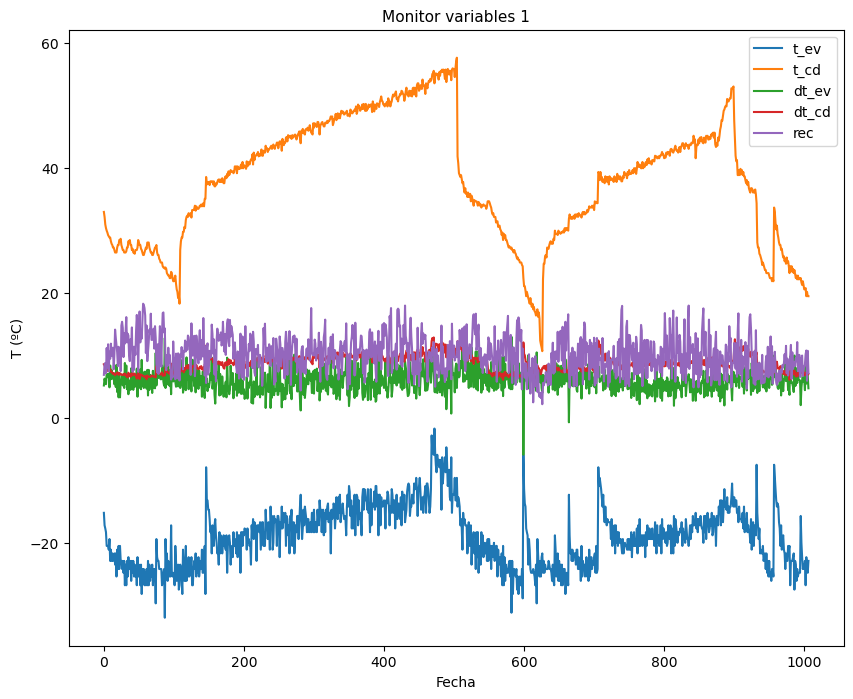

In [56]:
df[['t_ev','t_cd','dt_ev','dt_cd','rec']].plot(figsize = (10,8), fontsize = 10)
plt.ylabel('T (ºC)', fontsize=10)
plt.xlabel('Fecha', fontsize=10)
plt.title('Monitor variables 1', fontsize=11)
plt.legend();

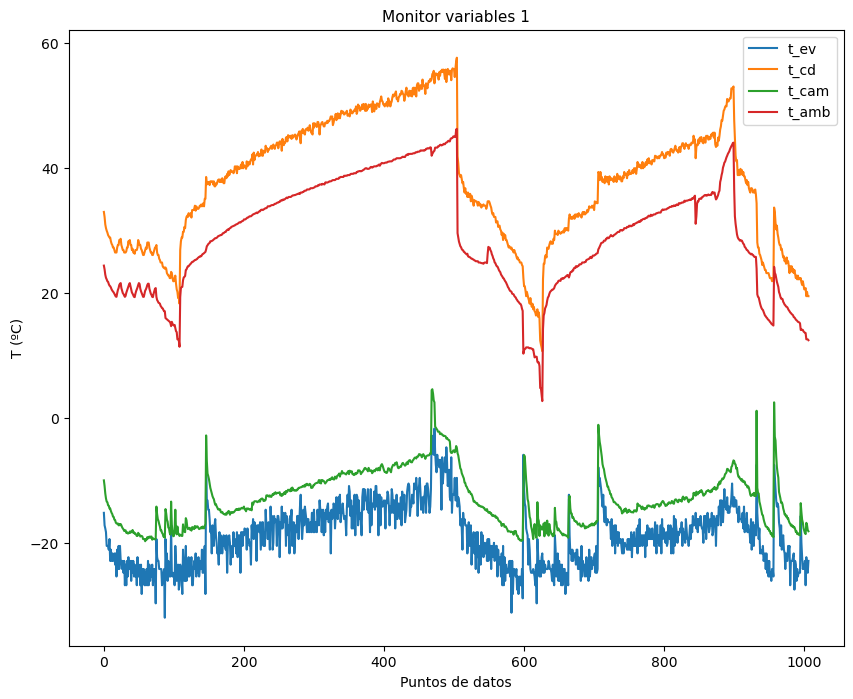

In [53]:
# Reiniciar el índice para que sea secuencial (sin discontinuidades en el tiempo)
df_reset = df[['t_ev','t_cd','t_cam','t_amb']].reset_index(drop=True)

# Graficar
df_reset.plot(figsize=(10, 8), fontsize=10)
plt.ylabel('T (ºC)', fontsize=10)
plt.xlabel('Puntos de datos', fontsize=10)  # Cambia la etiqueta del eje X para reflejar el nuevo índice
plt.title('Monitor variables 1', fontsize=11)
plt.legend()
plt.show()

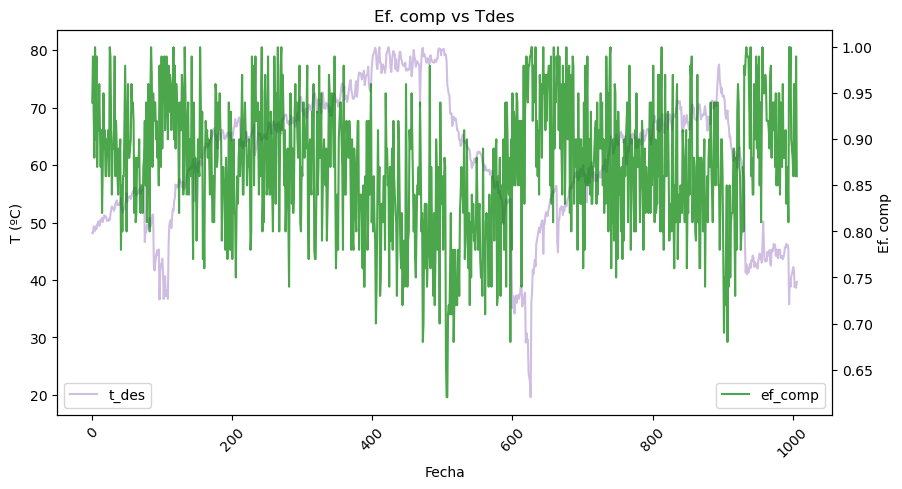

In [575]:
f, ax = plt.subplots(figsize = (10,5))
ax.plot(df[['t_des']], color = '#a37dc6', alpha = 0.5)
ax2 = ax.twinx()
ax2.plot(df[['ef_comp']],color = 'green', alpha = 0.7)
ax.legend(['t_des'], loc = 'lower left')
ax2.legend(['ef_comp'], loc = 'lower right')
ax.set_ylabel('T (ºC)')
ax2.set_ylabel('Ef. comp')
ax.set_title('Ef. comp vs Tdes')
ax.tick_params(axis='x',labelrotation=45)
ax.set_xlabel('Fecha');

# Parámetros promedio ciclo frigorífico

In [64]:
print('Tª evaporación media: ' , np.round(df.t_ev.median(),1))
print('Tª condensación media: ' , np.round(df.t_cd.median(),1))
print('Recalentamiento total medio: ' , np.round(df.rec.median(),1))
print('Subenfriamiento medio: ' , np.round(df.subf.median(),1))
print('Tª descarga media: ' , np.round(df.t_des.median(),1))
print('COP medio: ' , np.round(df.cop.median(),1))
print('Ef. comp media: ' , np.round(df.ef_comp.mean(),2))

Tª evaporación media:  -18.8
Tª condensación media:  38.9
Recalentamiento total medio:  10.1
Subenfriamiento medio:  4.5
Tª descarga media:  64.0
COP medio:  2.9
Ef. comp media:  0.87


# Estadísticas de las diferentes variables

In [90]:
df.dta_evap.describe()

count    1007.000000
mean        2.326365
std         0.709806
min       -12.200000
25%         2.200000
50%         2.350000
75%         2.525000
max         3.300000
Name: dta_evap, dtype: float64

# Distribuciones estadísticas de las diferentes variables

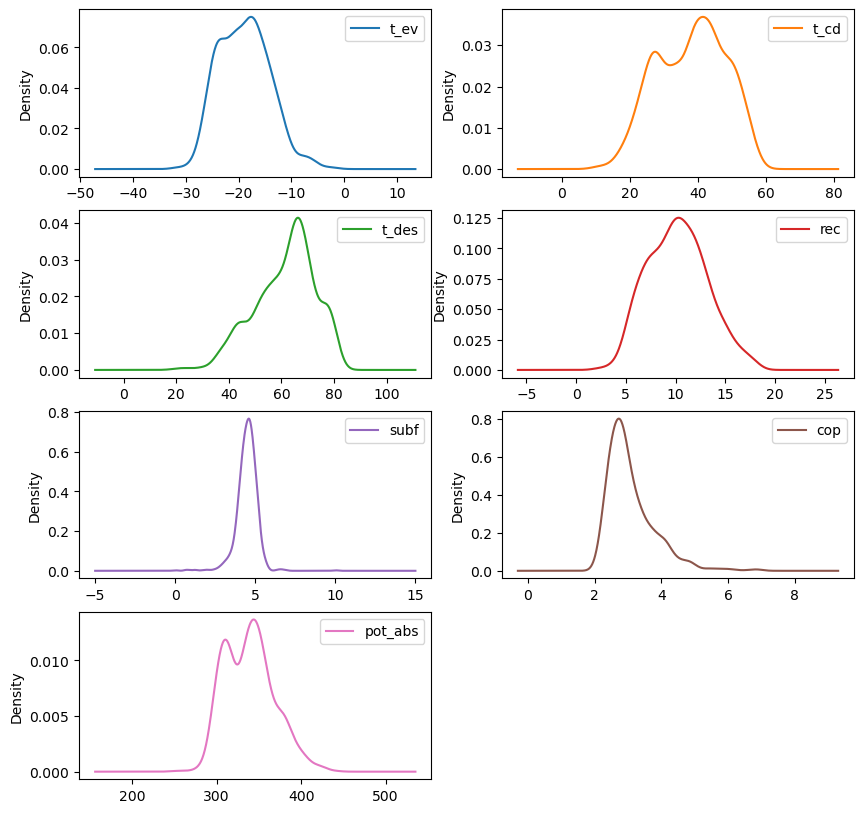

In [329]:
df[['t_ev','t_cd','t_des','rec','subf','cop','pot_abs']].plot.kde(subplots = True, sharex=False, layout=(4,2), figsize = (10,10));

# Correlación entre variables

In [572]:
df[['t_amb','t_cam','pa','pb','t_ev','t_cd','t_des','rec','subf','cop','ef_comp','rc','dt_cd','dt_ev','dta_evap','dta_cond']].corr().round(2)

,t_amb,t_cam,pa,pb,t_ev,t_cd,t_des,rec,subf,cop,ef_comp,rc,dt_cd,dt_ev,dta_evap,dta_cond
t_amb,1.00,0.76,0.99,0.73,0.74,1.00,0.95,0.13,-0.17,-0.83,-0.28,0.71,0.71,-0.13,0.10,0.74
t_cam,0.76,1.00,0.82,0.92,0.92,0.80,0.69,-0.08,-0.22,-0.44,-0.26,0.22,0.86,-0.02,-0.04,0.76
pa,0.99,0.82,1.00,0.78,0.79,1.00,0.94,0.09,-0.16,-0.80,-0.28,0.66,0.77,-0.11,0.08,0.78
pb,0.73,0.92,0.78,1.00,1.00,0.76,0.65,-0.17,-0.20,-0.39,-0.37,0.06,0.77,-0.40,-0.11,0.68
t_ev,0.74,0.92,0.79,1.00,1.00,0.77,0.66,-0.17,-0.20,-0.40,-0.37,0.07,0.77,-0.41,-0.08,0.70
t_cd,1.00,0.80,1.00,0.76,0.77,1.00,0.95,0.10,-0.16,-0.82,-0.29,0.69,0.77,-0.11,0.08,0.79
t_des,0.95,0.69,0.94,0.65,0.66,0.95,1.00,0.23,-0.30,-0.91,-0.43,0.73,0.68,-0.09,0.12,0.78
rec,0.13,-0.08,0.09,-0.17,-0.17,0.10,0.23,1.00,-0.27,-0.10,0.44,0.36,-0.08,0.24,0.08,0.06
subf,-0.17,-0.22,-0.16,-0.20,-0.20,-0.16,-0.30,-0.27,1.00,0.26,0.30,0.01,-0.05,0.01,-0.28,-0.34
cop,-0.83,-0.44,-0.80,-0.39,-0.40,-0.82,-0.91,-0.10,0.26,1.00,0.52,-0.80,-0.51,0.01,-0.21,-0.65


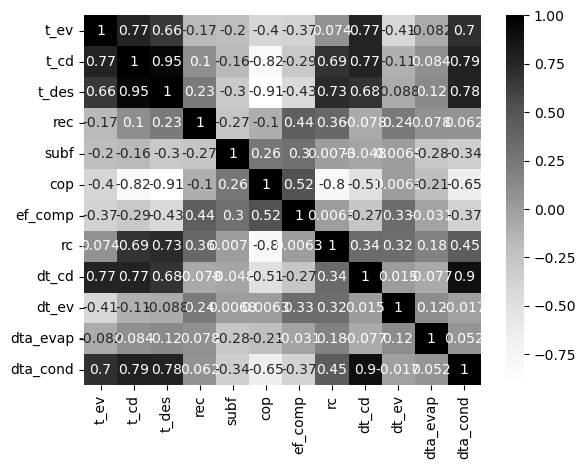

In [562]:
sns.heatmap(df[['t_ev','t_cd','t_des','rec','subf','cop','ef_comp','rc','dt_cd','dt_ev','dta_evap','dta_cond']].corr(), annot = True, cmap = 'Greys');

# Creación de gemelo digital R290 VEE

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Cargar el archivo CSV
file_path = 'Datos/tablon_R290_vee.csv'
data = pd.read_csv(file_path)

# Eliminar columnas no numéricas (como fechas)
data = data.select_dtypes(include=[np.number])

# Definir y entrenar los modelos en cascada
models = {}

# Predicción de t_ev
X_t_ev = data[['t_cam', 't_amb']]
y_t_ev = data['t_ev']
model_t_ev = RandomForestRegressor(random_state=42, n_estimators=200)
model_t_ev.fit(X_t_ev, y_t_ev)
models['t_ev'] = model_t_ev

# Predicción de t_cd
X_t_cd = data[['t_cam', 't_amb']]
y_t_cd = data['t_cd']
model_t_cd = RandomForestRegressor(random_state=42, n_estimators=200)
model_t_cd.fit(X_t_cd, y_t_cd)
models['t_cd'] = model_t_cd

# Predicción de rec
X_rec = data[['t_cam', 't_amb', 't_ev', 't_cd']]
y_rec = data['rec']
model_rec = RandomForestRegressor(random_state=42, n_estimators=200)
model_rec.fit(X_rec, y_rec)
models['rec'] = model_rec

# Predicción de t_des
X_t_des = data[['t_ev', 't_cd', 'rec','t_amb']]
y_t_des = data['t_des']
model_t_des = RandomForestRegressor(random_state=42, n_estimators=200)
model_t_des.fit(X_t_des, y_t_des)
models['t_des'] = model_t_des

# Predicción de subf
X_subf = data[['t_amb', 't_cd', 't_des']]
y_subf = data['subf']
model_subf = RandomForestRegressor(random_state=42, n_estimators=200)
model_subf.fit(X_subf, y_subf)
models['subf'] = model_subf

# Predicción de dta_evap
X_dta_evap = data[['t_cam', 't_ev']]
y_dta_evap = data['dta_evap']
model_dta_evap = RandomForestRegressor(random_state=42, n_estimators=200)
model_dta_evap.fit(X_dta_evap, y_dta_evap)
models['dta_evap'] = model_dta_evap

# Predicción de dta_cond
X_dta_cond = data[['t_cd', 't_amb']]
y_dta_cond = data['dta_cond']
model_dta_cond = RandomForestRegressor(random_state=42, n_estimators=200)
model_dta_cond.fit(X_dta_cond, y_dta_cond)
models['dta_cond'] = model_dta_cond

# Predicción de pot_abs
X_pot_abs = data[['t_des', 't_ev', 't_cd','t_amb','t_cam']]
y_pot_abs = data['pot_abs']
model_pot_abs = RandomForestRegressor(random_state=42, n_estimators=200)
model_pot_abs.fit(X_pot_abs, y_pot_abs)
models['pot_abs'] = model_pot_abs

# Predicción de cop
X_cop = data[['t_ev', 't_cd', 't_des', 'rec']]
y_cop = data['cop']
model_cop = RandomForestRegressor(random_state=42, n_estimators=200)
model_cop.fit(X_cop, y_cop)
models['cop'] = model_cop

# Predicción de ef_comp
X_ef_comp = data[['t_ev', 't_cd', 't_des','t_amb','t_cam']]
y_ef_comp = data['ef_comp']
model_ef_comp = RandomForestRegressor(random_state=42, n_estimators=200)
model_ef_comp.fit(X_ef_comp, y_ef_comp)
models['ef_comp'] = model_ef_comp

# Evaluar el rendimiento de los modelos
resultados = []
for var, model in models.items():
    X = data[model.feature_names_in_]
    y = data[var]
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    mape = np.mean(np.abs((y - y_pred) / y.replace(0, np.nan))) * 100
    resultados.append({'Variable': var, 'R2': r2, 'MAE': mae, 'MAPE': mape})

# Mostrar los resultados
resultados_df = pd.DataFrame(resultados)
print("\nMétricas del modelo Random Forest en cascada:")
print(resultados_df)






Métricas del modelo Random Forest en cascada:
   Variable        R2       MAE      MAPE
0      t_ev  0.969863  0.640218  3.880494
1      t_cd  0.999528  0.161394  0.455168
2       rec  0.903667  0.753968  8.359920
3     t_des  0.995125  0.574292  0.983533
4      subf  0.929629  0.114362  2.706049
5  dta_evap  0.863530  0.113766  5.739959
6  dta_cond  0.981678  0.126722  2.634046
7   pot_abs  0.990828  1.554928  0.460593
8       cop  0.996386  0.025012  0.758936
9   ef_comp  0.936785  0.014555  1.688427


In [6]:
# Calculadora final basada en los modelos en cascada
def calcular_variables(t_cam, t_amb):
    resultados = {}

    # Crear un DataFrame de entrada inicial
    input_data = pd.DataFrame([[t_cam, t_amb]], columns=['t_cam', 't_amb'])

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(input_data[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(input_data[['t_cam', 't_amb']])[0]

    # Predicción de rec
    input_data['t_ev'] = resultados['t_ev']
    input_data['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(input_data[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de t_des
    input_data['rec'] = resultados['rec']
    resultados['t_des'] = models['t_des'].predict(input_data[['t_ev', 't_cd', 'rec', 't_amb']])[0]

    # Predicción de subf
    input_data['t_des'] = resultados['t_des']
    resultados['subf'] = models['subf'].predict(input_data[['t_amb', 't_cd', 't_des']])[0]

    # Predicción de dta_evap
    resultados['dta_evap'] = models['dta_evap'].predict(input_data[['t_cam', 't_ev']])[0]

    # Predicción de dta_cond
    resultados['dta_cond'] = models['dta_cond'].predict(input_data[['t_cd', 't_amb']])[0]

    # Predicción de pot_abs
    resultados['pot_abs'] = models['pot_abs'].predict(input_data[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']])[0]

    # Predicción de cop
    resultados['cop'] = models['cop'].predict(input_data[['t_ev', 't_cd', 't_des', 'rec']])[0]

    # Predicción de ef_comp
    resultados['ef_comp'] = models['ef_comp'].predict(input_data[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']])[0]

    # Cálculo directo de dt_ev, dt_cd y pot_frig
    resultados['dt_ev'] = round(t_cam - resultados['t_ev'], 2)
    resultados['dt_cd'] = round(resultados['t_cd'] - t_amb, 2)
    resultados['pot_frig'] = round(resultados['pot_abs'] * resultados['cop'], 2)

    return resultados

# Ejemplo de uso
resultado = calcular_variables(-19, 40)
print("\nResultados del ejemplo:")
for variable, valor in resultado.items():
    print(f"{variable}: {valor:.2f}")


Resultados del ejemplo:
t_ev: -25.16
t_cd: 47.55
rec: 14.01
t_des: 71.37
subf: 3.64
dta_evap: 2.27
dta_cond: 4.26
pot_abs: 349.15
cop: 2.69
ef_comp: 0.92
dt_ev: 6.16
dt_cd: 7.55
pot_frig: 938.50


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pickle
import os

# Crear la carpeta 'models_vee' si no existe
os.makedirs('models_vee', exist_ok=True)

# Cargar el archivo CSV
file_path = 'Datos/tablon_R290_vee.csv'
data = pd.read_csv(file_path)

# Eliminar columnas no numéricas (como fechas)
data = data.select_dtypes(include=[np.number])

# Definir y entrenar los modelos en cascada
def entrenar_y_guardar_modelo(nombre, X, y):
    modelo = RandomForestRegressor(random_state=42, n_estimators=200)
    modelo.fit(X, y)
    with open(f'models_vee/{nombre}.pkl', 'wb') as archivo:
        pickle.dump(modelo, archivo)
    print(f"Modelo {nombre}.pkl guardado correctamente en models_vee.")

# Entrenar y guardar los modelos
entrenar_y_guardar_modelo('model_t_ev', data[['t_cam', 't_amb']], data['t_ev'])
entrenar_y_guardar_modelo('model_t_cd', data[['t_cam', 't_amb']], data['t_cd'])
entrenar_y_guardar_modelo('model_rec', data[['t_cam', 't_amb', 't_ev', 't_cd']], data['rec'])
entrenar_y_guardar_modelo('model_t_des', data[['t_ev', 't_cd', 'rec', 't_amb']], data['t_des'])
entrenar_y_guardar_modelo('model_subf', data[['t_amb', 't_cd', 't_des']], data['subf'])
entrenar_y_guardar_modelo('model_dta_evap', data[['t_cam', 't_ev']], data['dta_evap'])
entrenar_y_guardar_modelo('model_dta_cond', data[['t_cd', 't_amb']], data['dta_cond'])
entrenar_y_guardar_modelo('model_pot_abs', data[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']], data['pot_abs'])
entrenar_y_guardar_modelo('model_cop', data[['t_ev', 't_cd', 't_des', 'rec']], data['cop'])
entrenar_y_guardar_modelo('model_ef_comp', data[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']], data['ef_comp'])

print("\nTodos los modelos han sido guardados en la carpeta 'models_vee'.")


Modelo model_t_ev.pkl guardado correctamente en models_vee.
Modelo model_t_cd.pkl guardado correctamente en models_vee.
Modelo model_rec.pkl guardado correctamente en models_vee.
Modelo model_t_des.pkl guardado correctamente en models_vee.
Modelo model_subf.pkl guardado correctamente en models_vee.
Modelo model_dta_evap.pkl guardado correctamente en models_vee.
Modelo model_dta_cond.pkl guardado correctamente en models_vee.
Modelo model_pot_abs.pkl guardado correctamente en models_vee.
Modelo model_cop.pkl guardado correctamente en models_vee.
Modelo model_ef_comp.pkl guardado correctamente en models_vee.

Todos los modelos han sido guardados en la carpeta 'models_vee'.


In [2]:

codigo = """
import pandas as pd
import numpy as np
import pickle
import sys
import os

# Función para cargar modelos desde la carpeta "models_vee"
def cargar_modelo(nombre_archivo):
    ruta_completa = os.path.join('models_vee', nombre_archivo)
    if not os.path.exists(ruta_completa):
        raise FileNotFoundError(f"El archivo {ruta_completa} no existe. Asegúrate de que los modelos estén en la carpeta 'models_vee'.")
    with open(ruta_completa, 'rb') as archivo:
        return pickle.load(archivo)

# Cargar modelos entrenados desde archivos .pkl
models = {
    't_ev': cargar_modelo('model_t_ev.pkl'),
    't_cd': cargar_modelo('model_t_cd.pkl'),
    'rec': cargar_modelo('model_rec.pkl'),
    't_des': cargar_modelo('model_t_des.pkl'),
    'subf': cargar_modelo('model_subf.pkl'),
    'dta_evap': cargar_modelo('model_dta_evap.pkl'),
    'dta_cond': cargar_modelo('model_dta_cond.pkl'),
    'pot_abs': cargar_modelo('model_pot_abs.pkl'),
    'cop': cargar_modelo('model_cop.pkl'),
    'ef_comp': cargar_modelo('model_ef_comp.pkl')
}

# Calculadora final basada en los modelos en cascada
def calcular_variables(t_cam, t_amb):
    resultados = {}

    # Crear un DataFrame de entrada inicial
    input_data = pd.DataFrame([[t_cam, t_amb]], columns=['t_cam', 't_amb'])

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(input_data[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(input_data[['t_cam', 't_amb']])[0]

    # Predicción de rec
    input_data['t_ev'] = resultados['t_ev']
    input_data['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(input_data[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de t_des
    input_data['rec'] = resultados['rec']
    resultados['t_des'] = models['t_des'].predict(input_data[['t_ev', 't_cd', 'rec', 't_amb']])[0]

    # Predicción de subf
    input_data['t_des'] = resultados['t_des']
    resultados['subf'] = models['subf'].predict(input_data[['t_amb', 't_cd', 't_des']])[0]

    # Predicción de dta_evap
    resultados['dta_evap'] = models['dta_evap'].predict(input_data[['t_cam', 't_ev']])[0]

    # Predicción de dta_cond
    resultados['dta_cond'] = models['dta_cond'].predict(input_data[['t_cd', 't_amb']])[0]

    # Predicción de pot_abs
    resultados['pot_abs'] = models['pot_abs'].predict(input_data[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']])[0]

    # Predicción de cop
    resultados['cop'] = models['cop'].predict(input_data[['t_ev', 't_cd', 't_des', 'rec']])[0]

    # Predicción de ef_comp
    resultados['ef_comp'] = models['ef_comp'].predict(input_data[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']])[0]

    # Cálculo directo de dt_ev, dt_cd y pot_frig
    resultados['dt_ev'] = round(t_cam - resultados['t_ev'], 2)
    resultados['dt_cd'] = round(resultados['t_cd'] - t_amb, 2)
    resultados['pot_frig'] = round(resultados['pot_abs'] * resultados['cop'], 2)

    return resultados

if __name__ == "__main__":
    if len(sys.argv) != 3:
        print("Uso: python gemelo_r290_vee.py <t_cam> <t_amb>")
        sys.exit(1)

    try:
        t_cam = float(sys.argv[1])
        t_amb = float(sys.argv[2])

        resultado = calcular_variables(t_cam, t_amb)

        print("\\nResultados del ejemplo:")
        for variable, valor in resultado.items():
            print(f"{variable}: {valor:.2f}")

    except ValueError as e:
        print("Error: Asegúrate de que los valores de entrada sean números válidos.")
        sys.exit(1)
"""

# Guardar el archivo como .py
with open('gemelo_r290_vee.py', 'w', encoding='utf-8') as file:
    file.write(codigo)

print("El archivo 'gemelo_r290_vee.py' ha sido creado correctamente.")


El archivo 'gemelo_r290_vee.py' ha sido creado correctamente.


In [ ]:
codigo = """
import pandas as pd
import numpy as np
import pickle
import sys
import os

# Función para cargar modelos desde la carpeta "models_vee"
def cargar_modelo(nombre_archivo):
    ruta_completa = os.path.join('models_vee', nombre_archivo)
    if not os.path.exists(ruta_completa):
        raise FileNotFoundError(f"El archivo {ruta_completa} no existe. Asegúrate de que los modelos estén en la carpeta 'models_vee'.")
    with open(ruta_completa, 'rb') as archivo:
        return pickle.load(archivo)

# Cargar modelos entrenados desde archivos .pkl
models = {
    't_ev': cargar_modelo('model_t_ev.pkl'),
    't_cd': cargar_modelo('model_t_cd.pkl'),
    'rec': cargar_modelo('model_rec.pkl'),
    't_des': cargar_modelo('model_t_des.pkl'),
    'subf': cargar_modelo('model_subf.pkl'),
    'dta_evap': cargar_modelo('model_dta_evap.pkl'),
    'dta_cond': cargar_modelo('model_dta_cond.pkl'),
    'pot_abs': cargar_modelo('model_pot_abs.pkl'),
    'cop': cargar_modelo('model_cop.pkl'),
    'ef_comp': cargar_modelo('model_ef_comp.pkl')
}

# Desviaciones típicas conocidas de las variables
stats = {
    't_ev': {'mean': -18.92, 'std': 4.80},
    'rec': {'mean': 10.21, 'std': 2.98},
    'subf': {'mean': 4.48, 'std': 0.64}
}

# Calculadora final basada en los modelos en cascada
def calcular_variables(t_cam, t_amb):
    resultados = {}

    # Crear un DataFrame de entrada inicial
    input_data = pd.DataFrame([[t_cam, t_amb]], columns=['t_cam', 't_amb'])

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(input_data[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(input_data[['t_cam', 't_amb']])[0]

    # Predicción de rec
    input_data['t_ev'] = resultados['t_ev']
    input_data['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(input_data[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de subf
    input_data['rec'] = resultados['rec']
    input_data['t_des'] = models['t_des'].predict(input_data[['t_ev', 't_cd', 'rec', 't_amb']])[0]
    resultados['subf'] = models['subf'].predict(input_data[['t_amb', 't_cd', 't_des']])[0]

    return resultados

# Función para comparar valores reales con predichos y detectar anomalías
def detectar_anomalias(t_cam, t_amb, t_ev_real, rec_real, subf_real):
    # Calcular valores esperados
    valores_esperados = calcular_variables(t_cam, t_amb)

    # Comparar valores reales con los esperados
    desviacion_t_ev = (valores_esperados['t_ev'] - t_ev_real) / stats['t_ev']['std']
    desviacion_rec = (rec_real - valores_esperados['rec']) / stats['rec']['std']
    desviacion_subf = (subf_real - valores_esperados['subf']) / stats['subf']['std']

    if desviacion_t_ev < -2 and desviacion_rec > 2 and desviacion_subf > 2:
        print("\nFallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
        print(f"t_ev: Esperado={valores_esperados['t_ev']:.2f}, Real={t_ev_real:.2f}, Desviación={desviacion_t_ev:.2f}sd")
        print(f"rec: Esperado={valores_esperados['rec']:.2f}, Real={rec_real:.2f}, Desviación={desviacion_rec:.2f}sd")
        print(f"subf: Esperado={valores_esperados['subf']:.2f}, Real={subf_real:.2f}, Desviación={desviacion_subf:.2f}sd")
    else:
        print("\nNo se detectaron anomalías.")
        
        
        
        
            # Comparar valores reales con los esperados
    anomalias = {}
    for variable, valor_real in {'t_ev': t_ev_real, 'rec': rec_real, 'subf': subf_real}.items():
        valor_esperado = valores_esperados[variable]
        desviacion = abs(valor_real - valor_esperado) / stats[variable]['std']
        if desviacion > 2:
            anomalias[variable] = {'esperado': valor_esperado, 'real': valor_real, 'desviacion': f"{desviacion:.2f}sd"}

    return anomalias
        
        
        
        
        
        

if __name__ == "__main__":
    if len(sys.argv) != 6:
        print("Uso: python detector_fallo1_r290_vee.py <t_cam> <t_amb> <t_ev_real> <rec_real> <subf_real>")
        sys.exit(1)

    try:
        t_cam = float(sys.argv[1])
        t_amb = float(sys.argv[2])
        t_ev_real = float(sys.argv[3])
        rec_real = float(sys.argv[4])
        subf_real = float(sys.argv[5])

        detectar_anomalias(t_cam, t_amb, t_ev_real, rec_real, subf_real)

    except ValueError as e:
        print("Error: Asegúrate de que los valores de entrada sean números válidos.")
        sys.exit(1)
"""

# Guardar el archivo como .py
with open('detector_fallo1_r290_vee.py', 'w', encoding='utf-8') as file:
    file.write(codigo)

print("El archivo 'detector_fallo1_r290_vee.py' ha sido creado correctamente.")


# Creación de procesador de datos de monitorización

In [ ]:
import numpy as np
import pandas as pd
import CoolProp as cp
from CoolProp.CoolProp import PropsSI
import sys

# Cálculo de la temnperatura (ºC) conocida la presión relativa (bar) - R290
def convert_PT_R290(presion):
    temperatura = np.round(PropsSI('T', 'P', (presion+1)*100000, 'Q', 1, 'R290')-273.15,2)
    return temperatura

# Cálculo de la entaplía (kJ/kg), fuera de campana saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entalpia_R290_PT(presion, temperatura):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000,2)
    return entalpia

# Cálculo de la entropia (kJ/kgK), fuera de campana saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entropia_R290_PT(presion, temperatura):
    entropia = PropsSI('S', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000
    return entropia

# Cálculo de la entaplía (kJ/kg), en campana saturación, conocida la presión relativa (bar) y el título de vapor (0 a 1) - R290
def entalpia_R290_PQ(presion, tit_vapor):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'Q', tit_vapor, 'R290')/1000,2)
    return entalpia

# Cálculo de la entropia (kJ/kgK), en campana saturación, conocida la presión relativa (bar) y el título de vapor (0 a 1) - R290
def entropia_R290_PQ(presion, tit_vapor):
    entropia = PropsSI('S', 'P', (presion+1)*100000, 'Q', tit_vapor, 'R290')/1000
    return entropia

# Cálculo de la entaplía (kJ/kg) en campana saturación conocida la temperatura (ºC) y el título de vapor (0 a 1) - R290
def entalpia_R290_TQ(temperatura, tit_vapor):
    entalpia = np.round(PropsSI('H', 'T', temperatura+273.15, 'Q', tit_vapor, 'R290')/1000,2)
    return entalpia

# Cálculo de la entropía (kJ/kgK) en campana saturación conocida la temperatura (ºC) y el título de vapor (0 a 1) - R290
def entropia_R290_TQ(temperatura, tit_vapor):
    entropia = PropsSI('S', 'T', temperatura+273.15, 'Q', tit_vapor, 'R290')/1000
    return entropia

# Cálculo de la entalpía (kJ/kg) fuera de campana saturación, conocidas la presión relativa (bar) y la entropía (kJ/kgK) - R290
def entalpia_R290_PS(presion, entropia):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'S', entropia*1000, 'R290')/1000,2)
    return entalpia

# Cálculo del COP - R290
def cop(pb, pa, t_des, t_liq, t_asp):
    h_liq = entalpia_R290_PT(pa, t_liq)
    h_asp = entalpia_R290_PT(pb, t_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    cop = np.round((h_asp-h_liq)/(h_des-h_asp),2)
    return cop

def columna_cop(df):
    h_liq = entalpia_R290_PT(df.pa, df.t_liq)
    h_asp = entalpia_R290_PT(df.pb, df.t_asp)
    h_des = entalpia_R290_PT(df.pa, df.t_des)
    columna_cop = np.round((h_asp-h_liq)/(h_des-h_asp),2)
    return columna_cop

# Cálculo de la eficiencia isoentrópica de compresión - R290
def ef_comp(pb, pa, t_des, t_asp):
    h_asp = entalpia_R290_PT(pb, t_asp)
    s_asp = entropia_R290_PT(pb, t_asp)
    h_des_iso = entalpia_R290_PS(pa, s_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    s_des = entropia_R290_PT(pa, t_des)
    ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp),3)
    return ef_comp

def columna_ef_comp(df):
    h_asp = entalpia_R290_PT(df.pb, df.t_asp)
    s_asp = entropia_R290_PT(df.pb, df.t_asp)
    h_des_iso = entalpia_R290_PS(df.pa, s_asp)
    h_des = entalpia_R290_PT(df.pa, df.t_des)
    s_des = entropia_R290_PT(df.pa, df.t_des)
    columna_ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp),3)
    return columna_ef_comp

# Comprobar que se han introducido todas las variables necesarias
if len(sys.argv) != 13:
    print("Uso: python detector_fallos_r290_vee.py <pa> <pb> <t_asp> <t_des> <t_liq> <t_out_cond> <t_out_evap> <ta_in_cond> <ta_in_evap> <ta_out_cond> <ta_out_evap> <pot_abs>")
    sys.exit(1)

# Capturar las variables de entrada
pa = float(sys.argv[1])
pb = float(sys.argv[2])
t_asp = float(sys.argv[3])
t_des = float(sys.argv[4])
t_liq = float(sys.argv[5])
t_out_cond = float(sys.argv[6])
t_out_evap = float(sys.argv[7])
ta_in_cond = float(sys.argv[8])
ta_in_evap = float(sys.argv[9])
ta_out_cond = float(sys.argv[10])
ta_out_evap = float(sys.argv[11])
pot_abs = float(sys.argv[12])

# Crear un DataFrame con un solo registro
datos = {
    'pa': [pa],
    'pb': [pb],
    't_asp': [t_asp],
    't_des': [t_des],
    't_liq': [t_liq],
    't_out_cond': [t_out_cond],
    't_out_evap': [t_out_evap],
    'ta_in_cond': [ta_in_cond],
    'ta_in_evap': [ta_in_evap],
    'ta_out_cond': [ta_out_cond],
    'ta_out_evap': [ta_out_evap],
    'pot_abs': [pot_abs]
}

df = pd.DataFrame(datos)

# Obtener variables calculadas
df['t_ev'] = np.round(df.pb.apply(convert_PT_R290),1)
df['t_cd'] = np.round(df.pa.apply(convert_PT_R290),1)
df['t_out_evap'] = np.maximum(df['t_out_evap'], df['t_ev'])
df['t_asp'] = np.maximum(df['t_asp'], df['t_ev'])
df['t_liq'] = np.minimum(df['t_liq'], df['t_cd'])
df['rec_util'] = df.t_out_evap - df.t_ev
df['rec'] = df.t_asp - df.t_ev
df['subf'] = df.t_cd - df.t_liq
df['dt_ev'] = df.t_cam - df.t_ev
df['dt_cd'] = df.t_cd - df.t_amb
df['dta_evap'] = df.t_cam - df.ta_out_evap
df['dta_cond'] = df.ta_out_cond - df.t_amb
df['cop'] = np.round(np.round(df.apply(columna_cop, axis=1),1),1)
df['ef_comp'] = np.round(df.apply(columna_ef_comp, axis=1),2)
df['pot_frig'] = np.round(df.pot_abs*df.cop)

# Eliminar columnas no necesarias
df = df.drop(columns=['t_out_evap','t_asp','t_liq','ta_out_cond','ta_out_evap','fecha'])

# Ordenar columnas
orden = ['t_cam','t_amb','t_ev','t_cd','t_des','rec_util','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa','rc']
df = df[orden]


Bueno

In [76]:
codigo = """
import numpy as np
import pandas as pd
import CoolProp as cp
from CoolProp.CoolProp import PropsSI
import pickle
import sys
import os

# Función para calcular la temperatura (ºC) conocida la presión relativa (bar) - R290
def convert_PT_R290(presion):
    temperatura = np.round(PropsSI('T', 'P', (presion+1)*100000, 'Q', 1, 'R290')-273.15, 2)
    return temperatura

# Función para calcular la entalpía (kJ/kg) fuera de la campana de saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entalpia_R290_PT(presion, temperatura):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000, 2)
    return entalpia

# Función para calcular el COP - R290
def cop(pb, pa, t_des, t_liq, t_asp):
    h_liq = entalpia_R290_PT(pa, t_liq)
    h_asp = entalpia_R290_PT(pb, t_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    cop = np.round((h_asp-h_liq)/(h_des-h_asp), 2)
    return cop

# Función para calcular la eficiencia isoentrópica de compresión - R290
def ef_comp(pb, pa, t_des, t_asp):
    h_asp = entalpia_R290_PT(pb, t_asp)
    s_asp = PropsSI('S', 'P', (pb+1)*100000, 'T', t_asp+273.15, 'R290')/1000
    h_des_iso = PropsSI('H', 'P', (pa+1)*100000, 'S', s_asp*1000, 'R290')/1000
    h_des = entalpia_R290_PT(pa, t_des)
    ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp), 3)
    return ef_comp

# Verificar que se han introducido todas las variables necesarias
if len(sys.argv) < 13:
    print("Uso: python detector_fallos_r290_vee.py <pa> <pb> <t_asp> <t_des> <t_liq> <t_out_cond> <t_out_evap> <ta_in_cond> <ta_in_evap> <ta_out_cond> <ta_out_evap> <pot_abs> [<umbral_desviaciones>]")
    sys.exit(1)

# Capturar las variables de entrada
pa = float(sys.argv[1])
pb = float(sys.argv[2])
t_asp = float(sys.argv[3])
t_des = float(sys.argv[4])
t_liq = float(sys.argv[5])
t_out_cond = float(sys.argv[6])
t_out_evap = float(sys.argv[7])
ta_in_cond = float(sys.argv[8])
ta_in_evap = float(sys.argv[9])
ta_out_cond = float(sys.argv[10])
ta_out_evap = float(sys.argv[11])
pot_abs = float(sys.argv[12])
# Si hay un 14º argumento, lo usamos como umbral; si no, por defecto es 2.
if len(sys.argv) >= 14:
    umbral = float(sys.argv[13])
else:
    umbral = 2.0

# Crear un DataFrame con un solo registro
datos = {
    'pa': [pa],
    'pb': [pb],
    't_asp': [t_asp],
    't_des': [t_des],
    't_liq': [t_liq],
    't_out_cond': [t_out_cond],
    't_out_evap': [t_out_evap],
    'ta_in_cond': [ta_in_cond],
    'ta_in_evap': [ta_in_evap],
    'ta_out_cond': [ta_out_cond],
    'ta_out_evap': [ta_out_evap],
    'pot_abs': [pot_abs]
}

df = pd.DataFrame(datos)
df = df.rename(columns={'ta_in_evap': 't_cam', 'ta_in_cond': 't_amb'})

# Calcular variables adicionales
df['t_ev'] = np.round(df['pb'].apply(convert_PT_R290), 1)
df['t_cd'] = np.round(df['pa'].apply(convert_PT_R290), 1)
df['t_out_evap'] = np.maximum(df['t_out_evap'], df['t_ev'])
df['t_asp'] = np.maximum(df['t_asp'], df['t_ev'])
df['t_liq'] = np.minimum(df['t_liq'], df['t_cd'])
df['rec'] = df['t_asp'] - df['t_ev']
df['subf'] = df['t_cd'] - df['t_liq']
df['dt_ev'] = df.t_cam - df.t_ev
df['dt_cd'] = df.t_cd - df.t_amb
df['dta_evap'] = df.t_cam - df.ta_out_evap
df['dta_cond'] = df.ta_out_cond - df.t_amb
df['cop'] = cop(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_liq'].iloc[0], df['t_asp'].iloc[0])
df['ef_comp'] = ef_comp(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_asp'].iloc[0])
df['pot_frig'] = np.round(df['pot_abs'] * df['cop'], 1)

# Eliminar columnas innecesarias
df.drop(columns=['t_out_evap','t_asp', 't_liq'], inplace=True)

# Ordenar columnas
orden = ['t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
df = df[orden]

# Función para cargar modelos desde la carpeta "models_vee"
def cargar_modelo(nombre_archivo):
    ruta_completa = os.path.join('models_vee', nombre_archivo)
    if not os.path.exists(ruta_completa):
        raise FileNotFoundError(f"El archivo {ruta_completa} no existe. Asegúrate de que los modelos estén en la carpeta 'models_vee'.")
    with open(ruta_completa, 'rb') as archivo:
        return pickle.load(archivo)

# Cargar modelos entrenados desde archivos .pkl
models = {
    't_ev': cargar_modelo('model_t_ev.pkl'),
    't_cd': cargar_modelo('model_t_cd.pkl'),
    'rec': cargar_modelo('model_rec.pkl'),
    't_des': cargar_modelo('model_t_des.pkl'),
    'subf': cargar_modelo('model_subf.pkl'),
    'dta_evap': cargar_modelo('model_dta_evap.pkl'),
    'dta_cond': cargar_modelo('model_dta_cond.pkl'),
    'pot_abs': cargar_modelo('model_pot_abs.pkl'),
    'cop': cargar_modelo('model_cop.pkl'),
    'ef_comp': cargar_modelo('model_ef_comp.pkl')
}

# Desviaciones típicas conocidas de las variables
stats = {
    't_ev': {'mean': -18.92, 'std': 2},
    't_cd': {'mean': 37.98, 'std': 2},
    'rec': {'mean': 10.21, 'std': 2},
    't_des': {'mean': 61.46, 'std': 5},
    'subf': {'mean': 4.48, 'std': 2},
    'dta_evap': {'mean': 2.33, 'std': 1},
    'dta_cond': {'mean': 5.18, 'std': 2},
    'pot_abs': {'mean': 360.00, 'std': 18.25},
    'cop': {'mean': 3.85, 'std': 0.40},
    'ef_comp': {'mean': 0.92, 'std': 0.05}
}


# Calculadora final basada en los modelos en cascada
def calcular_variables(df):
    resultados = {}

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(df[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(df[['t_cam', 't_amb']])[0]

    # Predicción de rec
    #df['t_ev'] = resultados['t_ev']
    #df['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(df[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de t_des
    #df['rec'] = resultados['rec']
    resultados['t_des'] = models['t_des'].predict(df[['t_ev', 't_cd', 'rec', 't_amb']])[0]

    # Predicción de subf
    #df['t_des'] = resultados['t_des']
    resultados['subf'] = models['subf'].predict(df[['t_amb', 't_cd', 't_des']])[0]

    # Predicción de dta_evap
    #df['subf'] = resultados['subf']
    resultados['dta_evap'] = models['dta_evap'].predict(df[['t_cam', 't_ev']])[0]

    # Predicción de dta_cond
    resultados['dta_cond'] = models['dta_cond'].predict(df[['t_cd', 't_amb']])[0]

    # Predicción de pot_abs usando las columnas esperadas por el modelo
    resultados['pot_abs'] = models['pot_abs'].predict(df[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']])[0]

    # Predicción de cop
    resultados['cop'] = models['cop'].predict(df[['t_ev', 't_cd', 't_des', 'rec']])[0]

    # Predicción de ef_comp
    resultados['ef_comp'] = models['ef_comp'].predict(df[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']])[0]
    
    # Cálculo directo de dt_ev, dt_cd y pot_frig
    resultados['dt_ev'] = round(df['t_cam'].iloc[0] - resultados['t_ev'], 1)
    resultados['dt_cd'] = round(resultados['t_cd'] - df['t_amb'].iloc[0], 1)
    resultados['pot_frig'] = round(resultados['pot_abs'] * resultados['cop'], 0)

    return resultados

# Crear un DataFrame inicial con los valores reales
df['registro'] = 'real'

# Calcular los valores esperados usando los modelos
valores_esperados = calcular_variables(df.iloc[0:1])
df_esperado = pd.DataFrame([valores_esperados])
df_esperado['registro'] = 'esperado'

# Calcular la desviación
df_desviacion = df.select_dtypes(include=[np.number]).iloc[0] - df_esperado.select_dtypes(include=[np.number]).iloc[0]
df_desviacion['registro'] = 'desviación'

# Calcular el número de desviaciones típicas
n_sd = {}
for var in stats:
    n_sd[var] = (df_desviacion[var] / stats[var]['std']) if var in df_desviacion else 0

# Convertir a DataFrame y añadir al registro
df_n_sd = pd.DataFrame([n_sd])
df_n_sd['registro'] = 'n_sd'

# Concatenar los DataFrames
final_df = pd.concat([df, df_esperado, df_desviacion.to_frame().T, df_n_sd], ignore_index=True)

# Ordenar columnas
orden = ['registro','t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
final_df = final_df[orden]

# Redondear los valores en el DataFrame final, asegurando que no haya NaN
final_df['cop'] = np.round(final_df['cop'].fillna(0), 1)
final_df['ef_comp'] = np.round(final_df['ef_comp'].fillna(0), 2)
final_df['t_ev'] = np.round(final_df['t_ev'].fillna(0), 1)
final_df['t_cd'] = np.round(final_df['t_cd'].fillna(0), 1)
final_df['t_des'] = np.round(final_df['t_des'].fillna(0), 1)
final_df['rec'] = np.round(final_df['rec'].fillna(0), 1)
final_df['subf'] = np.round(final_df['subf'].fillna(0), 1)
final_df['dta_evap'] = np.round(final_df['dta_evap'].fillna(0), 1)
final_df['dta_cond'] = np.round(final_df['dta_cond'].fillna(0), 1)
final_df['dt_ev'] = np.round(final_df['dt_ev'].fillna(0), 1)
final_df['dt_cd'] = np.round(final_df['dt_cd'].fillna(0), 1)
final_df['pot_abs'] = np.round(final_df['pot_abs'].fillna(0))
final_df['pot_frig'] = np.round(final_df['pot_frig'].fillna(0))

# ---------------------------------
# DETECCIÓN DE FALLOS
# ---------------------------------

fallos = []

# Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio
# Si t_ev supera el umbral en negativo y rec en positivo, y subf es normal
if n_sd['t_ev'] < -2*umbral and n_sd['rec'] > 1.5*umbral and n_sd['subf'] > -umbral:
    fallos.append("Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
    
# Fallo 2: Falta de refrigerante
# Si t_ev y subf superan el umbral en negativo y rec en positivo
if n_sd['t_ev'] < -0.4*umbral and n_sd['subf'] < -0.5*umbral and n_sd['rec'] > 1.5*umbral:
    fallos.append("Fallo 2: Falta de refrigerante")

# Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador
# Si t_ev supera el umbral en negativo y tda_evap en positivo
if n_sd['t_ev'] < -0.5*umbral and n_sd['dta_evap'] > umbral:
    fallos.append("Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador")
    
# Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha 
# Si t_ev supera el umbral en negativo pero subf es normal, y rec normal
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] <= umbral and n_sd['dta_evap'] >= -umbral and n_sd['subf'] > -umbral and n_sd['rec'] <= 1.5*umbral:
    fallos.append("Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha ")

# Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha
# Si t_ev y tda_evap superan el umbral en negativo
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] < -umbral:
    fallos.append("Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha")

# Fallo 5: Válvula de expansión demasiado abierta
# Si t_ev supera el umbral en positivo y rec en negativo
if n_sd['t_ev'] > 0*umbral and n_sd['rec'] < -1.2*umbral:
    fallos.append("Fallo 5: Válvula de expansión demasiado abierta")

# Fallo 6: Falta de capacidad o by-pass en compresor
# Si t_ev supera el umbral en positivo y t_cd en negativo
if n_sd['t_ev'] > 0.8*umbral and n_sd['t_cd'] < -0.8*umbral:
    fallos.append("Fallo 6: Falta de capacidad o by-pass en compresor")
    
# Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador
# Si t_cd y dta_cond superan el umbral en positivo 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] > umbral:
    fallos.append("Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador")

# Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y subf es normal 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] <= umbral and n_sd['dta_cond'] >= -umbral and n_sd['subf'] <= umbral:
    fallos.append("Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador")
    
# Fallo 8: Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y dta_cond en negativo
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] < -umbral:
    fallos.append("Fallo 8: Transmisión insuficiente en el condensador / suciedad")
    
# Fallo 9: Exceso de refrigerante
# Si t_cd y subf supera el umbral en positivo
if n_sd['t_cd'] > umbral and n_sd['subf'] > umbral:
    fallos.append("Fallo 9: Exceso de refrigerante")

# Mostrar el DataFrame completo
print("Resultados:")
print(final_df)

if fallos:
    print("--- DETECCIÓN DE FALLOS ---")
    for i, fallo in enumerate(fallos, start=1):
        print(f"• {fallo}")
else:
    print("No se han detectado fallos.")
"""

# Guardar el archivo como un archivo .py
with open('detector_fallos_r290_vee.py', 'w', encoding='utf-8') as file:
    file.write(codigo)

print("El archivo 'detector_fallos_r290_vee.py' ha sido creado correctamente.")

El archivo 'detector_fallos_r290_vee.py' ha sido creado correctamente.


In [114]:
df.ef_comp.describe()

count    1007.000000
mean        0.871887
std         0.071038
min         0.620000
25%         0.820000
50%         0.870000
75%         0.920000
max         1.000000
Name: ef_comp, dtype: float64

APP STREAMLIT

In [376]:
codigo_stl = """
import streamlit as st
import pandas as pd
import numpy as np
import CoolProp as cp
from CoolProp.CoolProp import PropsSI
import pickle
import sys
import os

st.set_page_config(layout="wide")

# Función para calcular la temperatura (ºC) conocida la presión relativa (bar) - R290
def convert_PT_R290(presion):
    temperatura = np.round(PropsSI('T', 'P', (presion+1)*100000, 'Q', 1, 'R290')-273.15, 2)
    return temperatura

# Función para calcular la entalpía (kJ/kg) fuera de la campana de saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entalpia_R290_PT(presion, temperatura):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000, 2)
    return entalpia

# Función para calcular el COP - R290
def cop(pb, pa, t_des, t_liq, t_asp):
    h_liq = entalpia_R290_PT(pa, t_liq)
    h_asp = entalpia_R290_PT(pb, t_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    cop = np.round((h_asp-h_liq)/(h_des-h_asp), 2)
    return cop

# Función para calcular la eficiencia isoentrópica de compresión - R290
def ef_comp(pb, pa, t_des, t_asp):
    h_asp = entalpia_R290_PT(pb, t_asp)
    s_asp = PropsSI('S', 'P', (pb+1)*100000, 'T', t_asp+273.15, 'R290')/1000
    h_des_iso = PropsSI('H', 'P', (pa+1)*100000, 'S', s_asp*1000, 'R290')/1000
    h_des = entalpia_R290_PT(pa, t_des)
    ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp), 3)
    return ef_comp

# Función para cargar modelos preentrenados
def cargar_modelo(nombre_archivo):
    ruta_completa = os.path.join('models_vee', nombre_archivo)
    if not os.path.exists(ruta_completa):
        raise FileNotFoundError(f"El archivo {ruta_completa} no existe.")
    with open(ruta_completa, 'rb') as archivo:
        return pickle.load(archivo)

models = {
    't_ev': cargar_modelo('model_t_ev.pkl'),
    't_cd': cargar_modelo('model_t_cd.pkl'),
    'rec': cargar_modelo('model_rec.pkl'),
    't_des': cargar_modelo('model_t_des.pkl'),
    'subf': cargar_modelo('model_subf.pkl'),
    'dta_evap': cargar_modelo('model_dta_evap.pkl'),
    'dta_cond': cargar_modelo('model_dta_cond.pkl'),
    'pot_abs': cargar_modelo('model_pot_abs.pkl'),
    'cop': cargar_modelo('model_cop.pkl'),
    'ef_comp': cargar_modelo('model_ef_comp.pkl')
}

stats = {
    't_ev': {'mean': -18.92, 'std': 2},
    't_cd': {'mean': 37.98, 'std': 2},
    'rec': {'mean': 10.21, 'std': 2},
    't_des': {'mean': 61.46, 'std': 5},
    'subf': {'mean': 4.48, 'std': 2},
    'dta_evap': {'mean': 2.33, 'std': 1},
    'dta_cond': {'mean': 5.18, 'std': 2},
    'pot_abs': {'mean': 360.00, 'std': 18.25},
    'cop': {'mean': 3.85, 'std': 0.40},
    'ef_comp': {'mean': 0.92, 'std': 0.05},
    'pot_frig': {'mean': 1000, 'std': 50},
}

# Configuración de la app
st.markdown(
    \"""
    <h1 style='text-align: center; margin-top: 0px;'>
        Detector de fallos Equipo R290
    </h1>
    \""",
    unsafe_allow_html=True
)

# Captura de datos de entrada
st.sidebar.header("Introduzca las variables de entrada:")
pa = st.sidebar.number_input("Presión alta (bar)", value=9.6)
pb = st.sidebar.number_input("Presión baja (bar)", value=1.1)
t_asp = st.sidebar.number_input("Temperatura de aspiración (°C)", value=-10.1)
t_des = st.sidebar.number_input("Temperatura de descarga (°C)", value=54.1)
t_liq = st.sidebar.number_input("Temperatura del líquido (°C)", value=22.1)
t_amb = st.sidebar.number_input("Temperatura aire entrada condensador (°C)", value=20.1)
t_cam = st.sidebar.number_input("Temperatura aire entrada evaporador (°C)", value=-19.1)
ta_out_cond = st.sidebar.number_input("Temperatura aire salida condensador (°C)", value=23.1)
ta_out_evap = st.sidebar.number_input("Temperatura aire salida evaporador (°C)", value=-22.1)
pot_abs = st.sidebar.number_input("Potencia absorbida (W)", value=300.1)
umbral = st.sidebar.number_input("Umbral de desviaciones típicas", value=2.0)

# Crear DataFrame de entrada
datos = {
    'pa': [pa],
    'pb': [pb],
    't_asp': [t_asp],
    't_des': [t_des],
    't_liq': [t_liq],
    't_amb': [t_amb],
    't_cam': [t_cam],
    'ta_out_cond': [ta_out_cond],
    'ta_out_evap': [ta_out_evap],
    'pot_abs': [pot_abs]
}

df = pd.DataFrame(datos)

# Calcular variables reales
df['t_ev'] = np.round(df['pb'].apply(convert_PT_R290), 1)
df['t_cd'] = np.round(df['pa'].apply(convert_PT_R290), 1)
df['t_asp'] = np.maximum(df['t_asp'], df['t_ev'])
df['t_liq'] = np.minimum(df['t_liq'], df['t_cd'])
df['rec'] = df['t_asp'] - df['t_ev']
df['subf'] = df['t_cd'] - df['t_liq']
df['dt_ev'] = df['t_cam'] - df['t_ev']
df['dt_cd'] = df['t_cd'] - df['t_amb']
df['dta_evap'] = df['t_cam'] - df['ta_out_evap']
df['dta_cond'] = df['ta_out_cond'] - df['t_amb']
df['cop'] = cop(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_liq'].iloc[0], df['t_asp'].iloc[0])
df['ef_comp'] = ef_comp(pb, pa, t_des, t_asp)
df['pot_frig'] = np.round(df['pot_abs'] * df['cop'], 1)

# Eliminar columnas innecesarias
df.drop(columns=['t_asp', 't_liq','ta_out_cond','ta_out_evap'], inplace=True)

# Ordenar columnas
orden = ['t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
df = df[orden]

# Calculadora final basada en los modelos en cascada
def calcular_variables(df):
    resultados = {}

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(df[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(df[['t_cam', 't_amb']])[0]

    # Predicción de rec
    df['t_ev'] = resultados['t_ev']
    df['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(df[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de t_des
    df['rec'] = resultados['rec']
    resultados['t_des'] = models['t_des'].predict(df[['t_ev', 't_cd', 'rec', 't_amb']])[0]

    # Predicción de subf
    df['t_des'] = resultados['t_des']
    resultados['subf'] = models['subf'].predict(df[['t_amb', 't_cd', 't_des']])[0]

    # Predicción de dta_evap
    df['subf'] = resultados['subf']
    resultados['dta_evap'] = models['dta_evap'].predict(df[['t_cam', 't_ev']])[0]

    # Predicción de dta_cond
    resultados['dta_cond'] = models['dta_cond'].predict(df[['t_cd', 't_amb']])[0]

    # Predicción de pot_abs usando las columnas esperadas por el modelo
    resultados['pot_abs'] = models['pot_abs'].predict(df[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']])[0]

    # Predicción de cop
    resultados['cop'] = models['cop'].predict(df[['t_ev', 't_cd', 't_des', 'rec']])[0]

    # Predicción de ef_comp
    resultados['ef_comp'] = models['ef_comp'].predict(df[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']])[0]
    
    # Cálculo directo de dt_ev, dt_cd y pot_frig
    resultados['dt_ev'] = round(df['t_cam'].iloc[0] - resultados['t_ev'], 1)
    resultados['dt_cd'] = round(resultados['t_cd'] - df['t_amb'].iloc[0], 1)
    resultados['pot_frig'] = round(resultados['pot_abs'] * resultados['cop'], 0)

    return resultados

# Crear un DataFrame inicial con los valores reales
df['registro'] = 'real'

# Calcular los valores esperados usando los modelos
valores_esperados = calcular_variables(df.iloc[0:1])
df_esperado = pd.DataFrame([valores_esperados])
df_esperado['registro'] = 'esperado'

# Calcular la desviación
df_desviacion = df.select_dtypes(include=[np.number]).iloc[0] - df_esperado.select_dtypes(include=[np.number]).iloc[0]
df_desviacion['registro'] = 'desviación'

# Calcular el número de desviaciones típicas
n_sd = {}
for var in stats:
    n_sd[var] = (df_desviacion[var] / stats[var]['std']) if var in df_desviacion else 0

# Convertir a DataFrame y añadir al registro
df_n_sd = pd.DataFrame([n_sd])
df_n_sd['registro'] = 'n_sd'

# Concatenar los DataFrames
final_df = pd.concat([df, df_esperado, df_desviacion.to_frame().T, df_n_sd], ignore_index=True)

# Ordenar columnas
orden = ['registro','t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
final_df = final_df[orden]

# Redondear los valores en el DataFrame final, asegurando que no haya NaN
final_df['cop'] = np.round(final_df['cop'].fillna(0), 1)
final_df['ef_comp'] = np.round(final_df['ef_comp'].fillna(0), 2)
final_df['t_ev'] = np.round(final_df['t_ev'].fillna(0), 1)
final_df['t_cd'] = np.round(final_df['t_cd'].fillna(0), 1)
final_df['t_des'] = np.round(final_df['t_des'].fillna(0), 1)
final_df['rec'] = np.round(final_df['rec'].fillna(0), 1)
final_df['subf'] = np.round(final_df['subf'].fillna(0), 1)
final_df['dta_evap'] = np.round(final_df['dta_evap'].fillna(0), 1)
final_df['dta_cond'] = np.round(final_df['dta_cond'].fillna(0), 1)
final_df['dt_ev'] = np.round(final_df['dt_ev'].fillna(0), 1)
final_df['dt_cd'] = np.round(final_df['dt_cd'].fillna(0), 1)
final_df['pot_abs'] = np.round(final_df['pot_abs'].fillna(0))
final_df['pot_frig'] = np.round(final_df['pot_frig'].fillna(0))

# ---------------------------------
# DETECCIÓN DE FALLOS
# ---------------------------------

fallos = []

# Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio
# Si t_ev supera el umbral en negativo y rec en positivo, y subf es normal
if n_sd['t_ev'] < -2*umbral and n_sd['rec'] > 1.5*umbral and n_sd['subf'] > -umbral:
    fallos.append("Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
    
# Fallo 2: Falta de refrigerante
# Si t_ev y subf superan el umbral en negativo y rec en positivo
if n_sd['t_ev'] < -0.4*umbral and n_sd['subf'] < -0.5*umbral and n_sd['rec'] > 1.5*umbral:
    fallos.append("Fallo 2: Falta de refrigerante")

# Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador
# Si t_ev supera el umbral en negativo y tda_evap en positivo
if n_sd['t_ev'] < -0.5*umbral and n_sd['dta_evap'] > umbral:
    fallos.append("Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador")
    
# Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha 
# Si t_ev supera el umbral en negativo pero subf es normal, y rec normal
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] <= umbral and n_sd['dta_evap'] >= -umbral and n_sd['subf'] > -umbral and n_sd['rec'] <= 1.5*umbral:
    fallos.append("Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha ")

# Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha
# Si t_ev y tda_evap superan el umbral en negativo
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] < -umbral:
    fallos.append("Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha")

# Fallo 5: Válvula de expansión demasiado abierta
# Si t_ev supera el umbral en positivo y rec en negativo
if n_sd['t_ev'] > 0*umbral and n_sd['rec'] < -1.2*umbral:
    fallos.append("Fallo 5: Válvula de expansión demasiado abierta")

# Fallo 6: Falta de capacidad o by-pass en compresor
# Si t_ev supera el umbral en positivo y t_cd en negativo
if n_sd['t_ev'] > 0.8*umbral and n_sd['t_cd'] < -0.8*umbral:
    fallos.append("Fallo 6: Falta de capacidad o by-pass en compresor")
    
# Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador
# Si t_cd y dta_cond superan el umbral en positivo 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] > umbral:
    fallos.append("Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador")

# Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y subf es normal 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] <= umbral and n_sd['dta_cond'] >= -umbral and n_sd['subf'] <= umbral:
    fallos.append("Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador")
    
# Fallo 8: Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y dta_cond en negativo
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] < -umbral:
    fallos.append("Fallo 8: Transmisión insuficiente en el condensador / suciedad")
    
# Fallo 9: Exceso de refrigerante
# Si t_cd y subf supera el umbral en positivo
if n_sd['t_cd'] > umbral and n_sd['subf'] > umbral:
    fallos.append("Fallo 9: Exceso de refrigerante")

# Mostrar el DataFrame completo
print("Resultados:")
print(final_df)

if fallos:
    print("--- DETECCIÓN DE FALLOS ---")
    for i, fallo in enumerate(fallos, start=1):
        print(f"• {fallo}")
else:
    print("Sistema funcionando correctamente.")

import math
import plotly.graph_objects as go

# (Opcional) Para que la app use todo el ancho de la ventana:
# st.set_page_config(layout="wide")

# =============================================================================
# Función para crear el indicador tipo aguja
# - Valor REAL: cifra central y aguja (threshold) con color
# - Valor ESPERADO: pequeña marca negra en el dial
# - Rango del dial:
#    - t_amb => [0, 60]
#    - t_cam => [-30, 0]
#    - si hay (valor_esperado, std) => [valor_esperado ± 3*std]
#    - fallback => [valor_real ± 50%]
# =============================================================================
def crear_indicador_aguja(variable, valor_real, texto, unidad,
                          valor_esperado=None, std=None, rangos=None):
    # 1. Determinar el rango de la escala
    if variable == "t_amb":
        rango_min, rango_max = 0, 60
    elif variable == "t_cam":
        rango_min, rango_max = -30, 0
    elif std and (valor_esperado is not None):
        rango_min = valor_esperado - 3 * std
        rango_max = valor_esperado + 3 * std
    else:
        if valor_real == 0:
            valor_real = 0.1
        rango_min = valor_real - abs(valor_real) * 0.5
        rango_max = valor_real + abs(valor_real) * 0.5

    # 2. Configurar ticks para respetar valor esperado y extremos
    tickmode = "array"
    tickvals = None
    ticktext = None

    if std and (valor_esperado is not None):
        # Ticks centrados en el valor esperado ± 3*std
        min_tick = rango_min
        mid_tick = valor_esperado
        max_tick = rango_max
        tickvals = [min_tick, mid_tick, max_tick]
        if variable in ["pot_abs", "pot_frig"]:
            ticktext = [f"{min_tick:.0f}", f"{mid_tick:.0f}", f"{max_tick:.0f}"]
        else:
            ticktext = [f"{min_tick:.1f}", f"{mid_tick:.1f}", f"{max_tick:.1f}"]

    # 3. Configurar formato sin decimales para "pot_abs" y "pot_frig"
    tickformat = None
    if variable in ["pot_abs", "pot_frig"]:
        tickformat = ".0f"  # Mostrar solo enteros

    # 4. Elegir color de aguja y número en función de rangos o std
    color_aguja = "gray"
    if rangos:
        if rangos["verde"][0] <= valor_real < rangos["verde"][1]:
            color_aguja = "green"
        elif rangos["naranja"][0] <= valor_real < rangos["naranja"][1]:
            color_aguja = "orange"
        else:
            color_aguja = "red"
    elif std and (valor_esperado is not None):
        diff = abs(valor_real - valor_esperado)
        if diff <= std:
            color_aguja = "green"
        elif diff <= 2 * std:
            color_aguja = "orange"
        else:
            color_aguja = "red"

    # 5. Redondear valor si es "pot_abs" o "pot_frig"
    if variable in ["pot_abs", "pot_frig"]:
        valor_real = round(valor_real)

    # 6. Crear la figura del indicador
    indicador = go.Figure(go.Indicator(
        mode="gauge+number",
        value=valor_real,  # Número central redondeado
        title={"text": f"{texto} ({unidad})", "font": {"size": 20}},  # Tamaño del título
        number={"font": {"color": color_aguja, "size": 50}},  # Tamaño del número central
        gauge={
            "axis": {
                "range": [rango_min, rango_max],
                "tickmode": tickmode,
                "tickvals": tickvals,
                "ticktext": ticktext,
                "tickformat": tickformat,
                "tickfont": {"size": 18}  # Tamaño de los ticks
            },
            "bar": {"color": "white"},   # Sin barra rellena
            "threshold": {
                "line": {"color": color_aguja, "width": 6},
                "value": valor_real
            },
            "shape": "angular"
        }
    ))

    # 7. Añadir marca negra para el valor esperado (si lo hay)
    if valor_esperado is not None:
        frac_esp = (valor_esperado - rango_min) / (rango_max - rango_min)
        frac_esp = max(0, min(1, frac_esp))

        # 0° = derecha, 180° = izquierda
        angle_deg = 180 * (1 - frac_esp)
        angle_rad = math.radians(angle_deg)

        center_x, center_y = 0.5, 0.5
        inner_radius = 0.7
        outer_radius = 0.75

        x0 = center_x + inner_radius * math.cos(angle_rad)
        y0 = center_y + inner_radius * math.sin(angle_rad)
        x1 = center_x + outer_radius * math.cos(angle_rad)
        y1 = center_y + outer_radius * math.sin(angle_rad)

        indicador.add_shape(
            type="line",
            x0=x0, y0=y0,
            x1=x1, y1=y1,
            xref="paper", yref="paper",
            line=dict(color="black", width=3)
        )

    # 8. Ajustar layout
    indicador.update_layout(
        height=250,  # Tamaño del indicador
        width=200,   # Ancho del indicador
        margin=dict(t=30, b=10, l=70, r=70),  # Márgenes
        paper_bgcolor="white"
    )
    return indicador


# =============================
# USO EN STREAMLIT: EJEMPLO
# =============================
st.markdown(
    "<h2 style='text-align: center;'>Indicadores de funcionamiento</h2>",
    unsafe_allow_html=True
)

# Más separación horizontal entre columnas (gap="large")
col1, col2, col3 = st.columns(3, gap="large")

# Ejemplo de tus datos
# (Adaptar a tu df real, stats y valores_esperados)
indicadores = [
    ("t_cam", df["t_cam"].iloc[0], "Tª cámara", "ºC", None, None,
        {"verde": (-30, -15), "naranja": (-15, -5), "rojo": (-5, float("inf"))}),
    ("t_amb", df["t_amb"].iloc[0], "Tª ambiente", "ºC", None, None,
        {"verde": (0, 45), "naranja": (45, 55), "rojo": (55, float("inf"))}),
    ("t_ev",  df["t_ev"].iloc[0],  "Tª evaporación", "ºC",
        valores_esperados.get("t_ev"), stats["t_ev"]["std"], None),
    ("t_cd",  df["t_cd"].iloc[0],  "Tª condensación", "ºC",
        valores_esperados.get("t_cd"), stats["t_cd"]["std"], None),
    ("rec",   df["rec"].iloc[0],   "Recalentamiento", "K",
        valores_esperados.get("rec"), stats["rec"]["std"], None),
    ("subf",  df["subf"].iloc[0],  "Subenfriamiento", "K",
        valores_esperados.get("subf"), stats["subf"]["std"], None),
    ("pot_abs", df["pot_abs"].iloc[0], "Potencia absorbida", "W",
        valores_esperados.get("pot_abs"), stats["pot_abs"]["std"], None),
    ("pot_frig", df["pot_frig"].iloc[0], "Potencia frigorífica", "W",
        valores_esperados.get("pot_frig"), stats["pot_frig"]["std"], None),
    ("cop", df["cop"].iloc[0], "COP", "",
        valores_esperados.get("cop"), stats["cop"]["std"], None),
]

# Mostramos los 9 indicadores en 3 columnas
for i, (var, val_real, texto, unidad, val_esp, std, rangos) in enumerate(indicadores):
    # Ejemplo: no mostrar COP si < 1
    if var == "cop" and val_real < 1:
        continue

    fig = crear_indicador_aguja(
        variable=var,
        valor_real=val_real,
        texto=texto,
        unidad=unidad,
        valor_esperado=val_esp,
        std=std,
        rangos=rangos
    )

    if i % 3 == 0:
        col1.plotly_chart(fig, use_container_width=True)
    elif i % 3 == 1:
        col2.plotly_chart(fig, use_container_width=True)
    else:
        col3.plotly_chart(fig, use_container_width=True)

# Mostrar resultados
st.markdown(
    "<h3 style='text-align: center;'>Comparativa valores Reales vs Esperados</h3>",
    unsafe_allow_html=True
)
col1, col2, col3 = st.columns([0.5, 4, 0.5])  # La columna central es "4" veces más ancha
with col2:
    # Ajustamos el tamaño del dataframe al ancho deseado (p.ej. 1200 píxeles)
    st.dataframe(final_df, width=1200, height=178)

if fallos:
    for fallo in fallos:
        col1, col2, col3 = st.columns([1,2,1])
        with col2:
            st.error(fallo)
else:
    col1, col2, col3 = st.columns([1,2,1])
    with col2:
        st.success("Sistema funcionando correctamente.")

"""

with open('app_r290_vee.py', 'w', encoding='utf-8') as file:
    file.write(codigo_stl)

print("El archivo 'app_r290_vee.py' ha sido creado correctamente.")


El archivo 'app_r290_vee.py' ha sido creado correctamente.


In [107]:
codigo_stl = """
import streamlit as st
import pandas as pd
import numpy as np
import CoolProp as cp
from CoolProp.CoolProp import PropsSI
import pickle
import sys
import os
from streamlit_autorefresh import st_autorefresh


# Configuramos la página en modo "wide" (una única vez).
st.set_page_config(page_title="Detector fallos R290", layout="wide")

# 2. Configuración del auto-refresh cada 30 segundos
count = st_autorefresh(interval=60000, limit=None, key="fizzbuzzcounter")

st.markdown(\"""
    <style>
    /* Quita o reduce el padding superior en la parte central (modo wide) */
    .main .block-container {
        padding-top: 0rem !important;
        padding-bottom: 1rem !important;
    }

    /* Quita o reduce el padding en el sidebar */
    [data-testid="stSidebar"] > div:first-child {
        padding-top: 0rem !important;
        padding-bottom: 0rem !important;
        margin: 0rem !important;
    }
    </style>
\""", unsafe_allow_html=True)

# Función para calcular la temperatura (ºC) conocida la presión relativa (bar) - R290
def convert_PT_R290(presion):
    temperatura = np.round(PropsSI('T', 'P', (presion+1)*100000, 'Q', 1, 'R290')-273.15, 2)
    return temperatura

# Función para calcular la entalpía (kJ/kg) fuera de la campana de saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entalpia_R290_PT(presion, temperatura):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000, 2)
    return entalpia

# Función para calcular el COP - R290
def cop(pb, pa, t_des, t_liq, t_asp):
    h_liq = entalpia_R290_PT(pa, t_liq)
    h_asp = entalpia_R290_PT(pb, t_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    cop = np.round((h_asp-h_liq)/(h_des-h_asp), 2)
    return cop

# Función para calcular la eficiencia isoentrópica de compresión - R290
def ef_comp(pb, pa, t_des, t_asp):
    h_asp = entalpia_R290_PT(pb, t_asp)
    s_asp = PropsSI('S', 'P', (pb+1)*100000, 'T', t_asp+273.15, 'R290')/1000
    h_des_iso = PropsSI('H', 'P', (pa+1)*100000, 'S', s_asp*1000, 'R290')/1000
    h_des = entalpia_R290_PT(pa, t_des)
    ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp), 3)
    return ef_comp

# Función para cargar modelos preentrenados
def cargar_modelo(nombre_archivo):
    ruta_completa = os.path.join('models_vee', nombre_archivo)
    if not os.path.exists(ruta_completa):
        raise FileNotFoundError(f"El archivo {ruta_completa} no existe.")
    with open(ruta_completa, 'rb') as archivo:
        return pickle.load(archivo)

models = {
    't_ev': cargar_modelo('model_t_ev.pkl'),
    't_cd': cargar_modelo('model_t_cd.pkl'),
    'rec': cargar_modelo('model_rec.pkl'),
    't_des': cargar_modelo('model_t_des.pkl'),
    'subf': cargar_modelo('model_subf.pkl'),
    'dta_evap': cargar_modelo('model_dta_evap.pkl'),
    'dta_cond': cargar_modelo('model_dta_cond.pkl'),
    'pot_abs': cargar_modelo('model_pot_abs.pkl'),
    'cop': cargar_modelo('model_cop.pkl'),
    'ef_comp': cargar_modelo('model_ef_comp.pkl')
}

stats = {
    't_ev': {'mean': -18.92, 'std': 2},
    't_cd': {'mean': 37.98, 'std': 2},
    'rec': {'mean': 10.21, 'std': 2},
    't_des': {'mean': 61.46, 'std': 5},
    'subf': {'mean': 4.48, 'std': 2},
    'dta_evap': {'mean': 2.33, 'std': 1},
    'dta_cond': {'mean': 5.18, 'std': 2},
    'pot_abs': {'mean': 360.00, 'std': 20},
    'cop': {'mean': 3.85, 'std': 0.40},
    'ef_comp': {'mean': 0.92, 'std': 0.05},
    'pot_frig': {'mean': 1000, 'std': 60},
}

# Configuración de la app
st.markdown(
    \"""
    <h1 style='text-align: center; margin-top: 0px;'>
        Detector de fallos Equipo R290
    </h1>
    \""",
    unsafe_allow_html=True
)

# Captura de datos de entrada
import pymysql
import streamlit as st

# Función para establecer la conexión con la base de datos
def get_connection():
    return pymysql.connect(
        host="juande.eu",
        port=3306,
        user="juandeeu_digital",
        password="ContraseN.4",
        database="juandeeu_db"
    )

# Función para obtener todas las fechas disponibles en la tabla
def get_all_dates():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(\"""
        SELECT DISTINCT fecha
        FROM incalab
        ORDER BY fecha DESC
    \""")
    dates = cursor.fetchall()
    cursor.close()
    conn.close()
    return [date[0] for date in dates]  # Convertimos las fechas a una lista

# Función para obtener los datos según la fecha seleccionada
def get_data_by_date(selected_date):
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(\"""
        SELECT fecha, pa, pb, t_asp, t_des, t_liq, ta_in_cond, ta_in_evap,
               ta_out_cond, ta_out_evap, pot_abs
        FROM incalab
        WHERE fecha = %s
    \""", (selected_date,))
    row = cursor.fetchone()
    cursor.close()
    conn.close()

    # Cambiar nombres de variables ta_in_cond -> t_amb y ta_in_evap -> t_cam
    if row:
        row = list(row)
        row[6] = row[6]  # ta_in_cond -> t_amb
        row[7] = row[7]  # ta_in_evap -> t_cam
    return row

# =============================
# USO EN STREAMLIT
# =============================

# Muestra el logotipo en la parte superior de la barra lateral
st.sidebar.image("Logo3.png", width=250)  # Ajusta el width que más te convenga

st.sidebar.header("Datos recibidos en tiempo real")

# Obtener todas las fechas disponibles
fechas_disponibles = get_all_dates()

# Selector de fecha en el sidebar
#selected_date = st.sidebar.selectbox(
    #"Seleccione la fecha del registro:",
    #fechas_disponibles

selected_date = fechas_disponibles[0]


# Obtener los datos correspondientes a la fecha seleccionada
datos = get_data_by_date(selected_date)

if datos:
    # Desempaquetamos la tupla en las variables
    (fecha, pa, pb, t_asp, t_des, t_liq,
     t_amb, t_cam, ta_out_cond, ta_out_evap,
     pot_abs) = datos

    # Mostramos en el sidebar
    st.sidebar.write(f"**Fecha último registro:** {fecha}")
    st.sidebar.write(f"**Tª ambiente (°C):** {t_amb}")
    st.sidebar.write(f"**Tª cámara (°C):** {t_cam}")
    st.sidebar.write(f"**Presión alta (bar):** {pa}")
    st.sidebar.write(f"**Presión baja (bar):** {pb}")
    st.sidebar.write(f"**Tª aspiración (°C):** {t_asp}")
    st.sidebar.write(f"**Tª descarga (°C):** {t_des}")
    st.sidebar.write(f"**Tª líquido (°C):** {t_liq}")
    st.sidebar.write(f"**Tª aire salida condensador (°C):** {ta_out_cond}")
    st.sidebar.write(f"**Tª aire salida evaporador (°C):** {ta_out_evap}")
    st.sidebar.write(f"**Potencia absorbida (W):** {pot_abs}")
else:
    st.sidebar.error("No se encontraron registros para la fecha seleccionada.")

    
# En el sidebar: Celda para modificar el parámetro umbral
umbral = st.sidebar.number_input(
     "Nº desviaciones típicas umbral para fallo",
      min_value=0.0,  # Valor mínimo permitido
      max_value=10.0,  # Valor máximo permitido
      value=2.0,  # Valor por defecto
      step=0.1  # Incrementos de 0.1
)
    


# Crear DataFrame de entrada
datos = {
    'pa': [pa],
    'pb': [pb],
    't_asp': [t_asp],
    't_des': [t_des],
    't_liq': [t_liq],
    't_amb': [t_amb],
    't_cam': [t_cam],
    'ta_out_cond': [ta_out_cond],
    'ta_out_evap': [ta_out_evap],
    'pot_abs': [pot_abs]
}

df = pd.DataFrame(datos)

# Convertir columnas relevantes a numéricas
columnas_numericas = ['pa', 'pb', 't_asp', 't_des', 't_liq', 't_amb', 't_cam', 'ta_out_cond', 'ta_out_evap', 'pot_abs']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con NaN en las columnas clave
df = df.dropna(subset=columnas_numericas)

# Calcular variables reales
df['t_ev'] = np.round(df['pb'].apply(convert_PT_R290), 1)
df['t_cd'] = np.round(df['pa'].apply(convert_PT_R290), 1)
df['t_asp'] = np.maximum(df['t_asp'], df['t_ev'])
df['t_liq'] = np.minimum(df['t_liq'], df['t_cd'])
df['rec'] = df['t_asp'] - df['t_ev']
df['subf'] = df['t_cd'] - df['t_liq']
df['dt_ev'] = df['t_cam'] - df['t_ev']
df['dt_cd'] = df['t_cd'] - df['t_amb']
df['dta_evap'] = df['t_cam'] - df['ta_out_evap']
df['dta_cond'] = df['ta_out_cond'] - df['t_amb']
df['cop'] = cop(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_liq'].iloc[0], df['t_asp'].iloc[0])
df['ef_comp'] = ef_comp(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_asp'].iloc[0])
df['pot_frig'] = np.round(df['pot_abs'] * df['cop'], 1)

# Eliminar columnas innecesarias
df.drop(columns=['t_asp', 't_liq','ta_out_cond','ta_out_evap'], inplace=True)

# Ordenar columnas
orden = ['t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
df = df[orden]

# Calculadora final basada en los modelos en cascada
def calcular_variables(df):
    resultados = {}

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(df[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(df[['t_cam', 't_amb']])[0]

    # Predicción de rec
    #df['t_ev'] = resultados['t_ev']
    #df['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(df[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de t_des
    #df['rec'] = resultados['rec']
    resultados['t_des'] = models['t_des'].predict(df[['t_ev', 't_cd', 'rec', 't_amb']])[0]

    # Predicción de subf
    #df['t_des'] = resultados['t_des']
    resultados['subf'] = models['subf'].predict(df[['t_amb', 't_cd', 't_des']])[0]

    # Predicción de dta_evap
    #df['subf'] = resultados['subf']
    resultados['dta_evap'] = models['dta_evap'].predict(df[['t_cam', 't_ev']])[0]

    # Predicción de dta_cond
    resultados['dta_cond'] = models['dta_cond'].predict(df[['t_cd', 't_amb']])[0]

    # Predicción de pot_abs usando las columnas esperadas por el modelo
    resultados['pot_abs'] = models['pot_abs'].predict(df[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']])[0]

    # Predicción de cop
    resultados['cop'] = models['cop'].predict(df[['t_ev', 't_cd', 't_des', 'rec']])[0]

    # Predicción de ef_comp
    resultados['ef_comp'] = models['ef_comp'].predict(df[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']])[0]
    
    # Cálculo directo de dt_ev, dt_cd y pot_frig
    resultados['dt_ev'] = round(df['t_cam'].iloc[0] - resultados['t_ev'], 1)
    resultados['dt_cd'] = round(resultados['t_cd'] - df['t_amb'].iloc[0], 1)
    resultados['pot_frig'] = round(resultados['pot_abs'] * resultados['cop'], 0)

    return resultados

# Crear un DataFrame inicial con los valores reales
df['registro'] = 'real'

# Calcular los valores esperados usando los modelos
valores_esperados = calcular_variables(df.iloc[0:1])
df_esperado = pd.DataFrame([valores_esperados])
df_esperado['registro'] = 'esperado'

# Calcular la desviación
df_desviacion = df.select_dtypes(include=[np.number]).iloc[0] - df_esperado.select_dtypes(include=[np.number]).iloc[0]
df_desviacion['registro'] = 'desviación'

# Calcular el número de desviaciones típicas
n_sd = {}
for var in stats:
    n_sd[var] = (df_desviacion[var] / stats[var]['std']) if var in df_desviacion else 0

# Convertir a DataFrame y añadir al registro
df_n_sd = pd.DataFrame([n_sd])
df_n_sd['registro'] = 'n_sd'

# Concatenar los DataFrames
final_df = pd.concat([df, df_esperado, df_desviacion.to_frame().T, df_n_sd], ignore_index=True)

# Ordenar columnas
orden = ['registro','t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
final_df = final_df[orden]

# Redondear los valores en el DataFrame final, asegurando que no haya NaN
final_df['cop'] = np.round(final_df['cop'].fillna(0), 1)
final_df['ef_comp'] = np.round(final_df['ef_comp'].fillna(0), 2)
final_df['t_ev'] = np.round(final_df['t_ev'].fillna(0), 1)
final_df['t_cd'] = np.round(final_df['t_cd'].fillna(0), 1)
final_df['t_des'] = np.round(final_df['t_des'].fillna(0), 1)
final_df['rec'] = np.round(final_df['rec'].fillna(0), 1)
final_df['subf'] = np.round(final_df['subf'].fillna(0), 1)
final_df['dta_evap'] = np.round(final_df['dta_evap'].fillna(0), 1)
final_df['dta_cond'] = np.round(final_df['dta_cond'].fillna(0), 1)
final_df['dt_ev'] = np.round(final_df['dt_ev'].fillna(0), 1)
final_df['dt_cd'] = np.round(final_df['dt_cd'].fillna(0), 1)
final_df['pot_abs'] = np.round(final_df['pot_abs'].fillna(0))
final_df['pot_frig'] = np.round(final_df['pot_frig'].fillna(0))

# ---------------------------------
# DETECCIÓN DE FALLOS
# ---------------------------------

fallos = []

# Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio
# Si t_ev supera el umbral en negativo y rec en positivo, y subf es normal
if n_sd['t_ev'] < -2*umbral and n_sd['rec'] > 1.5*umbral and n_sd['subf'] > -umbral:
    fallos.append("Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
    
# Fallo 2: Falta de refrigerante
# Si t_ev y subf superan el umbral en negativo y rec en positivo
if n_sd['t_ev'] < -0.4*umbral and n_sd['subf'] < -0.5*umbral and n_sd['rec'] > 1.5*umbral:
    fallos.append("Fallo 2: Falta de refrigerante")

# Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador
# Si t_ev supera el umbral en negativo y tda_evap en positivo
if n_sd['t_ev'] < -0.5*umbral and n_sd['dta_evap'] > umbral:
    fallos.append("Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador")
    
# Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha 
# Si t_ev supera el umbral en negativo pero subf es normal, y rec normal
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] <= umbral and n_sd['dta_evap'] >= -umbral and n_sd['subf'] > -umbral and n_sd['rec'] <= 1.5*umbral:
    fallos.append("Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha ")

# Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha
# Si t_ev y tda_evap superan el umbral en negativo
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] < -umbral:
    fallos.append("Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha")

# Fallo 5: Válvula de expansión demasiado abierta
# Si t_ev supera el umbral en positivo y rec en negativo
if n_sd['t_ev'] > 0*umbral and n_sd['rec'] < -1.2*umbral:
    fallos.append("Fallo 5: Válvula de expansión demasiado abierta")

# Fallo 6: Falta de capacidad o by-pass en compresor
# Si t_ev supera el umbral en positivo y t_cd en negativo
if n_sd['t_ev'] > 0.8*umbral and n_sd['t_cd'] < -0.8*umbral:
    fallos.append("Fallo 6: Falta de capacidad o by-pass en compresor")
    
# Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador
# Si t_cd y dta_cond superan el umbral en positivo 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] > umbral:
    fallos.append("Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador")

# Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y subf es normal 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] <= umbral and n_sd['dta_cond'] >= -umbral and n_sd['subf'] <= umbral:
    fallos.append("Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador")
    
# Fallo 8: Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y dta_cond en negativo
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] < -umbral:
    fallos.append("Fallo 8: Transmisión insuficiente en el condensador / suciedad")
    
# Fallo 9: Exceso de refrigerante
# Si t_cd y subf supera el umbral en positivo
if n_sd['t_cd'] > umbral and n_sd['subf'] > umbral:
    fallos.append("Fallo 9: Exceso de refrigerante")
# Mostrar el DataFrame completo
print("Resultados:")
print(final_df)

if fallos:
    print("--- DETECCIÓN DE FALLOS ---")
    for i, fallo in enumerate(fallos, start=1):
        print(f"• {fallo}")
else:
    print("Sistema funcionando correctamente")
    
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import streamlit as st

# =============================
# FUNCIÓN PARA OBTENER TODAS LAS FECHAS DISPONIBLES
# =============================
def get_all_dates():

    conn = get_connection()
    cursor = conn.cursor()
    
    cursor.execute(\"""
        SELECT DISTINCT fecha
        FROM incalab
        ORDER BY fecha ASC
    \""")
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    
    # Convertir a lista de fechas
    return [pd.to_datetime(row[0], format="%d-%m-%Y (%H:%M:%S)") for row in rows]

# =============================
# FUNCIÓN PARA OBTENER LOS ÚLTIMOS 300 REGISTROS
# =============================
def get_last_300_records():

    conn = get_connection()
    cursor = conn.cursor()
    
    cursor.execute(\"""
        SELECT fecha, pa, pb, t_asp, t_des, t_liq, ta_in_cond, ta_in_evap,
               ta_out_cond, ta_out_evap, pot_abs
        FROM incalab
        ORDER BY fecha DESC
        LIMIT 300
    \""")
    
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    
    # Convertir a DataFrame y ordenar por fecha ascendente
    columns = ["fecha", "pa", "pb", "t_asp", "t_des", "t_liq", "t_amb", "t_cam", "ta_out_cond", "ta_out_evap", "pot_abs"]
    df = pd.DataFrame(rows, columns=columns)
    df["fecha"] = pd.to_datetime(df["fecha"], format="%d-%m-%Y (%H:%M:%S)")  # Convertir a datetime
    return df.sort_values(by="fecha")  # Ordenar por fecha en orden ascendente

# =============================
# FUNCIÓN PARA PROCESAR LOS DATOS CRUDOS
# =============================
def process_raw_data(df_raw):

    df_raw["fecha"] = pd.to_datetime(df_raw["fecha"])  # Asegurar que la fecha sea datetime

    # Convertir columnas relevantes a numéricas
    columnas_numericas = ['pa', 'pb', 't_asp', 't_des', 't_liq', 't_amb', 't_cam', 'ta_out_cond', 'ta_out_evap', 'pot_abs']
    for col in columnas_numericas:
        df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    # Eliminar filas con NaN en las columnas clave
    df_raw = df_raw.dropna(subset=columnas_numericas)

    # Calcular variables reales
    df_raw['t_ev'] = np.round(df_raw['pb'].apply(convert_PT_R290), 1)
    df_raw['t_cd'] = np.round(df_raw['pa'].apply(convert_PT_R290), 1)
    df_raw['t_asp'] = np.maximum(df_raw['t_asp'], df_raw['t_ev'])
    df_raw['t_liq'] = np.minimum(df_raw['t_liq'], df_raw['t_cd'])
    df_raw['rec'] = df_raw['t_asp'] - df_raw['t_ev']
    df_raw['subf'] = df_raw['t_cd'] - df_raw['t_liq']
    df_raw['dt_ev'] = df_raw['t_cam'] - df_raw['t_ev']
    df_raw['dt_cd'] = df_raw['t_cd'] - df_raw['t_amb']
    df_raw['dta_evap'] = df_raw['t_cam'] - df_raw['ta_out_evap']
    df_raw['dta_cond'] = df_raw['ta_out_cond'] - df_raw['t_amb']
    df_raw['cop'] = df_raw.apply(lambda row: cop(row['pb'], row['pa'], row['t_des'], row['t_liq'], row['t_asp']), axis=1)
    df_raw['ef_comp'] = df_raw.apply(lambda row: ef_comp(row['pb'], row['pa'], row['t_des'], row['t_asp']), axis=1)
    df_raw['pot_frig'] = np.round(df_raw['pot_abs'] * df_raw['cop'], 1)

    # Eliminar columnas innecesarias
    df_raw.drop(columns=['t_asp', 't_liq', 'ta_out_cond', 'ta_out_evap'], inplace=True)

    # Ordenar columnas
    orden = ['fecha', 't_cam', 't_amb', 't_ev', 't_cd', 't_des', 'rec', 'subf', 'dt_ev', 'dt_cd',
             'dta_evap', 'dta_cond', 'pot_abs', 'pot_frig', 'cop', 'ef_comp', 'pb', 'pa']
    return df_raw[orden]

# =============================
# USO DE LA FUNCIÓN EN STREAMLIT
# =============================


# Obtener todos los registros desde la base de datos
def get_all_records():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(
        \"""
        SELECT fecha, pa, pb, t_asp, t_des, t_liq, ta_in_cond, ta_in_evap,
               ta_out_cond, ta_out_evap, pot_abs
        FROM incalab
        ORDER BY fecha ASC
        \"""
    )
    rows = cursor.fetchall()
    cursor.close()
    conn.close()

    # Convertir a DataFrame
    columns = ["fecha", "pa", "pb", "t_asp", "t_des", "t_liq", "t_amb", "t_cam", "ta_out_cond", "ta_out_evap", "pot_abs"]
    df = pd.DataFrame(rows, columns=columns)

    # Ajustar el formato de las fechas al formato real de la base de datos
    df["fecha"] = pd.to_datetime(df["fecha"], format="%d-%m-%Y (%H:%M:%S)", errors="coerce")
    
    # Eliminar registros con fechas inválidas
    df = df.dropna(subset=["fecha"])

    return df

# Cargar todos los registros
df_raw = get_all_records()

if df_raw.empty:
    st.warning("No se encontraron registros en la base de datos.")
else:
    # Procesar los datos crudos
    df_processed = process_raw_data(df_raw)

    # Fechas por defecto basadas en los últimos 300 registros
    df_last_300 = df_processed.tail(300)
    default_start_datetime = df_last_300["fecha"].min()
    default_end_datetime = df_last_300["fecha"].max()

    # Generar las fechas con el formato "2025-01-21 (17:59:29)" y ordenarlas de más reciente a menos reciente
    formatted_dates = [d.strftime("%Y-%m-%d (%H:%M:%S)") for d in df_processed["fecha"]]
    formatted_dates_desc = list(reversed(formatted_dates))  # Ordenar de más reciente a menos reciente

    # Seleccionar rango de tiempo personalizado
    col1, col2 = st.columns(2)
    with col1:
        start_datetime_str = st.selectbox(
            "Fecha y hora de inicio",
            formatted_dates_desc,
            index=formatted_dates_desc.index(default_start_datetime.strftime("%Y-%m-%d (%H:%M:%S)"))
        )
    with col2:
        end_datetime_str = st.selectbox(
            "Fecha y hora de final",
            formatted_dates_desc,
            index=formatted_dates_desc.index(default_end_datetime.strftime("%Y-%m-%d (%H:%M:%S)"))
        )

    # Convertir las fechas seleccionadas de vuelta a datetime
    start_datetime = pd.to_datetime(start_datetime_str, format="%Y-%m-%d (%H:%M:%S)")
    end_datetime = pd.to_datetime(end_datetime_str, format="%Y-%m-%d (%H:%M:%S)")

    # Filtrar datos según el rango seleccionado
    mask = (df_processed["fecha"] >= start_datetime) & (df_processed["fecha"] <= end_datetime)
    df_filtered = df_processed.loc[mask]

    if df_filtered.empty:
        st.warning("No hay registros para el rango de tiempo seleccionado.")
    else:
        # Variables principales por defecto y variables adicionales opcionales
        default_variables = ["t_cam", "t_amb", "t_ev", "t_cd", "t_des", "rec", "subf"]
        additional_variables = ['dt_ev', 'dt_cd', 'dta_evap', 'dta_cond', 'pot_abs', 'pot_frig', 'cop', 'ef_comp']

        # Mostrar todas las variables en el multiselect, con las predeterminadas seleccionadas por defecto
        selected_variables = st.multiselect(
            "Seleccione las variables para graficar:",
            default_variables + additional_variables,  # Combina las listas
            default=default_variables  # Seleccionadas por defecto
        )

        if selected_variables:
            # Crear la gráfica
            fig, ax = plt.subplots(figsize=(12, 5))  # Tamaño ajustado de la gráfica
            
            # Diccionario para personalizar los colores de las líneas
            line_colors = {
                "t_cam": "#33e6ff",
                "t_amb": "orange",
                "t_ev": "#3c33ff",
                "t_cd": "red",
                "t_des": "purple",
                "rec": "#33ff5b",
                "subf": "magenta",
                "dt_ev": "brown",
                "dt_cd": "pink",
                "dta_evap": "lime",
                "dta_cond": "teal",
                "pot_abs": "black",
                "pot_frig": "gold",
                "cop": "darkred",
                "ef_comp": "darkgreen"
        }

            # Diccionario para personalizar el grosor de las líneas
            line_widths = {
                "t_cam": 1,
                "t_amb": 1,
                "t_ev": 2,
                "t_cd": 2,
                "t_des": 1,
                "rec": 1,
                "subf": 1,
                "dt_ev": 1,
                "dt_cd": 1,
                "dta_evap": 1,
                "dta_cond": 1,
                "pot_abs": 1,
                "pot_frig": 1,
                "cop": 1,
                "ef_comp": 1
            }
            # Generar líneas con grosores y colores personalizados
            for var in selected_variables:
                ax.plot(
                    df_filtered["fecha"], 
                    df_filtered[var], 
                    label=var, 
                    linewidth=line_widths.get(var, 1),  # Grosor de la línea
                    color=line_colors.get(var, "gray")  # Color de la línea (por defecto: "gray" si no está en el diccionario)
            )

            # Configuración de la gráfica
            ax.set_title("Monitorización de variables", fontsize=10)  # Tamaño del título
            ax.set_xlabel("Fecha", fontsize=8)  # Tamaño del texto del eje X
            ax.set_ylabel("Tª (ºC), Pot (W)", fontsize=9)  # Tamaño del texto del eje Y
            ax.legend(fontsize=7)  # Reducir tamaño de la leyenda
            ax.tick_params(axis="both", labelsize=8)  # Tamaño de los números en los ejes
            ax.grid(True)  # Activar cuadrícula

            # Mostrar la gráfica
            st.pyplot(fig)



import math
import plotly.graph_objects as go

# (Opcional) Para que la app use todo el ancho de la ventana:
# st.set_page_config(layout="wide")

# =============================
# CONFIGURACIÓN VISUAL DE LOS INDICADORES
# =============================

# Configuración para indicadores principales (2x2)
config_principales = {
    "height": 250,  # Altura del indicador
    "width": 200,   # Ancho del indicador
    "titulo_tamano": 20,  # Tamaño del título
    "numero_tamano": 45,  # Tamaño del número central
    "tick_tamano": 20,    # Tamaño de los ticks
    "margenes": {"t": 30, "b": 10, "l": 50, "r": 50}# Márgenes
}

# Configuración para indicadores secundarios (3x3)
config_secundarios = {
    "height": 250,  # Altura del indicador
    "width": 200,   # Ancho del indicador
    "titulo_tamano": 20,  # Tamaño del título
    "numero_tamano": 45,  # Tamaño del número central
    "tick_tamano": 20,    # Tamaño de los ticks
    "margenes": {"t": 30, "b": 10, "l": 50, "r": 50}  # Márgenes
}

# =============================
# FUNCIÓN PARA CREAR INDICADORES
# =============================
def crear_indicador_aguja(variable, valor_real, texto, unidad,
                          config, valor_esperado=None, std=None, rangos=None):
    # 1. Determinar el rango de la escala
    if variable == "t_amb":
        rango_min, rango_max = 0, 60
    elif variable == "t_cam":
        rango_min, rango_max = -30, 0
    elif std and (valor_esperado is not None):
        rango_min = valor_esperado - 3 * std
        rango_max = valor_esperado + 3 * std
    else:
        if valor_real == 0:
            valor_real = 0.1
        rango_min = valor_real - abs(valor_real) * 0.5
        rango_max = valor_real + abs(valor_real) * 0.5

    # 2. Configurar ticks para respetar valor esperado y extremos
    tickmode = "array"
    tickvals = None
    ticktext = None

    if std and (valor_esperado is not None):
        # Ticks centrados en el valor esperado ± 3*std
        min_tick = rango_min
        mid_tick = valor_esperado
        max_tick = rango_max
        tickvals = [min_tick, mid_tick, max_tick]
        if variable in ["pot_abs", "pot_frig"]:
            ticktext = [f"{min_tick:.0f}", f"{mid_tick:.0f}", f"{max_tick:.0f}"]
        else:
            ticktext = [f"{min_tick:.1f}", f"{mid_tick:.1f}", f"{max_tick:.1f}"]

    # 3. Configurar formato sin decimales para "pot_abs" y "pot_frig"
    tickformat = None
    if variable in ["pot_abs", "pot_frig"]:
        tickformat = ".0f"  # Mostrar solo enteros

    # 4. Elegir color de aguja y número en función de rangos o std
    color_aguja = "gray"
    if rangos:
        if rangos["verde"][0] <= valor_real < rangos["verde"][1]:
            color_aguja = "green"
        elif rangos["naranja"][0] <= valor_real < rangos["naranja"][1]:
            color_aguja = "orange"
        else:
            color_aguja = "red"
    elif std and (valor_esperado is not None):
        diff = abs(valor_real - valor_esperado)
        if diff <= std:
            color_aguja = "green"
        elif diff <= 2 * std:
            color_aguja = "orange"
        else:
            color_aguja = "red"

    # 5. Redondear valor si es "pot_abs" o "pot_frig"
    if variable in ["pot_abs", "pot_frig"]:
        valor_real = round(valor_real)

    # 6. Crear la figura del indicador
    indicador = go.Figure(go.Indicator(
        mode="gauge+number",
        value=valor_real,  # Número central redondeado
        title={"text": f"{texto} ({unidad})", "font": {"size": config["titulo_tamano"]}},  # Tamaño del título
        number={"font": {"color": color_aguja, "size": config["numero_tamano"]}},  # Tamaño del número central
        gauge={
            "axis": {
                "range": [rango_min, rango_max],
                "tickmode": tickmode,
                "tickvals": tickvals,
                "ticktext": ticktext,
                "tickformat": tickformat,
                "tickfont": {"size": config["tick_tamano"]}  # Tamaño de los ticks
            },
            "bar": {"color": "white"},   # Sin barra rellena
            "threshold": {
                "line": {"color": color_aguja, "width": 6},
                "value": valor_real
            },
            "shape": "angular"
        }
    ))

    # 7. Añadir marca negra para el valor esperado (si lo hay)
    if valor_esperado is not None:
        frac_esp = (valor_esperado - rango_min) / (rango_max - rango_min)
        frac_esp = max(0, min(1, frac_esp))

        # 0° = derecha, 180° = izquierda
        angle_deg = 180 * (1 - frac_esp)
        angle_rad = math.radians(angle_deg)

        center_x, center_y = 0.5, 0.5
        inner_radius = 0.7
        outer_radius = 0.75

        x0 = center_x + inner_radius * math.cos(angle_rad)
        y0 = center_y + inner_radius * math.sin(angle_rad)
        x1 = center_x + outer_radius * math.cos(angle_rad)
        y1 = center_y + outer_radius * math.sin(angle_rad)

        indicador.add_shape(
            type="line",
            x0=x0, y0=y0,
            x1=x1, y1=y1,
            xref="paper", yref="paper",
            line=dict(color="black", width=3)
        )

    # 8. Ajustar layout
    indicador.update_layout(
        height=config["height"],  # Tamaño del indicador
        width=config["width"],   # Ancho del indicador
        margin=config["margenes"],  # Márgenes
        paper_bgcolor="white"
    )
    return indicador

st.markdown(
    "<h2 style='text-align: center;'>Variables en tiempo real</h2>",
    unsafe_allow_html=True
)

# --------------------------------------------------
# CREAR 4 COLUMNAS
# --------------------------------------------------
col1, col2, col3, col4 = st.columns(4, gap="large")

# --------------------------------------------------
# UNIFICAR TODOS LOS INDICADORES EN UNA LISTA
# --------------------------------------------------
all_indicators = [
    # --- 4 indicadores principales ---
    (
        "t_cam", 
        df["t_cam"].iloc[0], 
        "Tª cámara", 
        "ºC", 
        None,  # valores_esperados.get("t_cam") si lo deseas
        None,  # stats.get("t_cam", {}).get("std") si lo deseas
        {"verde": (-30, -15), "naranja": (-15, -5), "rojo": (-5, float("inf"))},
        config_principales  # <-- Usa la config principal
    ),
    (
        "t_amb", 
        df["t_amb"].iloc[0], 
        "Tª ambiente", 
        "ºC", 
        None,  
        None,  
        {"verde": (0, 45), "naranja": (45, 55), "rojo": (55, float("inf"))},
        config_principales
    ),
    (
        "t_ev",  
        df["t_ev"].iloc[0],  
        "Tª evaporación", 
        "ºC",
        valores_esperados.get("t_ev"), 
        stats["t_ev"]["std"], 
        None,
        config_principales
    ),
    (
        "t_cd",  
        df["t_cd"].iloc[0],  
        "Tª condensación", 
        "ºC",
        valores_esperados.get("t_cd"), 
        stats["t_cd"]["std"], 
        None,
        config_principales
    ),

    # --- 6 indicadores secundarios ---
    (
        "t_des",  
        df["t_des"].iloc[0],  
        "Tª descarga", 
        "ºC",
        valores_esperados.get("t_des"), 
        stats["t_des"]["std"], 
        None,
        config_secundarios  # <-- Usa la config secundaria
    ),
    (
        "rec",    
        df["rec"].iloc[0],    
        "Recalentamiento", 
        "K",
        valores_esperados.get("rec"), 
        stats["rec"]["std"], 
        None,
        config_secundarios
    ),
    (
        "subf",   
        df["subf"].iloc[0],   
        "Subenfriamiento", 
        "K",
        valores_esperados.get("subf"), 
        stats["subf"]["std"], 
        None,
        config_secundarios
    ),
    (
        "pot_abs", 
        df["pot_abs"].iloc[0], 
        "Potencia absorbida", 
        "W",
        valores_esperados.get("pot_abs"), 
        stats["pot_abs"]["std"], 
        None,
        config_secundarios
    ),
    (
        "pot_frig", 
        df["pot_frig"].iloc[0], 
        "Potencia frigorífica", 
        "W",
        valores_esperados.get("pot_frig"), 
        stats["pot_frig"]["std"], 
        None,
        config_secundarios
    ),
    (
        "cop",    
        df["cop"].iloc[0],    
        "COP", 
        "",
        valores_esperados.get("cop"), 
        stats["cop"]["std"], 
        None,
        config_secundarios
    )
]


# --------------------------------------------------
# VERIFICAR CONDICIÓN DE pb
# --------------------------------------------------
if (
    (
        df["pb"].iloc[0] < 0.5
        and n_sd['subf'] > -umbral
        and df["t_cam"].iloc[0] < -19
    )
    or (df["pot_abs"].iloc[0] < 200)
):
    # Si se cumple la condición de recogida de gas, mostramos SOLO los 4 primeros indicadores (principales)
    indicators_to_show = all_indicators[:4]
else:
    # Si pb >= 0.5, mostramos TODOS
    indicators_to_show = all_indicators

# --------------------------------------------------
# MOSTRAR INDICADORES EN 4 COLUMNAS
# --------------------------------------------------


for i, (var, val_real, texto, unidad, val_esp, std, rangos, cfg) in enumerate(indicators_to_show):
    
    # Si cop <= 0, saltamos pot_frig y cop (si lo deseas)
    if var in ["pot_frig", "cop"] and df["cop"].iloc[0] <= 0:
        continue
    
    # Generar la figura
    fig = crear_indicador_aguja(
        variable=var,
        valor_real=val_real,
        texto=texto,
        unidad=unidad,
        config=cfg,  # <- Se aplica config_principales o config_secundarios
        valor_esperado=val_esp,
        std=std,
        rangos=rangos
    )
    
    # Ubicar en la columna correcta
    if i % 4 == 0:
        col1.plotly_chart(fig, use_container_width=True)
    elif i % 4 == 1:
        col2.plotly_chart(fig, use_container_width=True)
    elif i % 4 == 2:
        col3.plotly_chart(fig, use_container_width=True)
    else:
        col4.plotly_chart(fig, use_container_width=True)

# --------------------------------------------------
# MENSAJE SI HAY RECOGIDA CDE GAS
# --------------------------------------------------

if (
    (
        df["pb"].iloc[0] < 0.5
        and n_sd['subf'] > -umbral
        and df["t_cam"].iloc[0] < -19
    )
    or (df["pot_abs"].iloc[0] < 200)
):
    st.markdown(
        \"""
        <div style="
            text-align: center;
            font-size: 24px;
            font-weight: bold;
            color: white;
            background-color: #5B9BD5;
            padding: 10px;
            animation: blinker 2s linear infinite;
            margin-bottom: 50px;
        ">
            Equipo en parada por recogida de gas
        </div>
        <style>
            @keyframes blinker {
                50% { opacity: 0; }
            }
        </style>
        \""",
        unsafe_allow_html=True
    )
    
      
# ========================================
# FUNCIÓN que detecta fallos en UNA fila
# ========================================
def detectar_fallos_en_fila(df_fila: pd.DataFrame, umbral: float) -> list:

    # 1) Crear df_esperado para esa fila
    valores_esperados_local = calcular_variables(df_fila.iloc[0:1])
    df_esperado_local = pd.DataFrame([valores_esperados_local])

    # 2) Calcular desviaciones
    df_desv = df_fila.select_dtypes(include=[np.number]).iloc[0] - df_esperado_local.select_dtypes(include=[np.number]).iloc[0]

    # 3) Calcular n_sd local
    n_sd_local = {}
    for var in stats:
        if var in df_desv:
            n_sd_local[var] = df_desv[var] / stats[var]['std']
        else:
            n_sd_local[var] = 0

    # 4) Aplicar la misma lógica de fallos
    fallos_local = []

    # == Mismo set de condiciones que en tu código ==
    if n_sd_local['t_ev'] < -2*umbral and n_sd_local['rec'] > 1.5*umbral and n_sd_local['subf'] > -umbral:
        fallos_local.append("Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
    if n_sd_local['t_ev'] < -0.4*umbral and n_sd_local['subf'] < -0.5*umbral and n_sd_local['rec'] > 1.5*umbral:
        fallos_local.append("Fallo 2: Falta de refrigerante")
    if n_sd_local['t_ev'] < -0.5*umbral and n_sd_local['dta_evap'] > umbral:
        fallos_local.append("Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador")
    if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] <= umbral and n_sd['dta_evap'] >= -umbral and n_sd['subf'] > -umbral and n_sd['rec'] <= 1.5*umbral:
        fallos_local.append("Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente / escarcha")
    if n_sd_local['t_ev'] < -umbral and n_sd_local['dta_evap'] < -umbral:
        fallos_local.append("Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha")
    if n_sd_local['t_ev'] > 0*umbral and n_sd_local['rec'] < -1.2*umbral:
        fallos_local.append("Fallo 5: Válvula de expansión demasiado abierta")
    if n_sd_local['t_ev'] > 0.8*umbral and n_sd_local['t_cd'] < -0.8*umbral:
        fallos_local.append("Fallo 6: Falta de capacidad o by-pass en compresor")
    if n_sd_local['t_cd'] > umbral and n_sd_local['dta_cond'] > umbral:
        fallos_local.append("Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador")
    if n_sd_local['t_cd'] > umbral and -umbral <= n_sd_local['dta_cond'] <= umbral and n_sd['subf'] <= umbral:
        fallos_local.append("Fallo 7 y 8: Caudal de aire insuficiente en el condensador + Transmisión insuficiente / suciedad")
    if n_sd_local['t_cd'] > umbral and n_sd_local['dta_cond'] < -umbral:
        fallos_local.append("Fallo 8: Transmisión insuficiente o suciedad en el condensador")
    if n_sd_local['t_cd'] > umbral and n_sd_local['subf'] > umbral:
        fallos_local.append("Fallo 9: Exceso de refrigerante")

    return fallos_local

# ========================================
# DETECCIÓN DE FALLOS EN LOS N ÚLTIMOS REGISTROS
# ========================================
# Suponiendo que df_processed es el DataFrame
# con todos los registros que usas para la gráfica,
# ordenado cronológicamente.

# En el sidebar: Selector para definir el número de registros N
n = st.sidebar.number_input(
    label="Nº registros consecutivos para detección de fallos",
    min_value=1,           # Valor mínimo permitido
    max_value=100,         # Valor máximo permitido
    value=6,               # Valor por defecto
    step=1,                # Incrementos de 1
)
    
df_ultimosN = df_processed.tail(n)

if len(df_ultimosN) < n:
    st.warning("No hay al menos N registros en el rango seleccionado.")
else:
    from collections import Counter
    
    fallos_counter = Counter()
    for i in range(len(df_ultimosN)):
        df_fila = df_ultimosN.iloc[i:i+1].copy()
        
        # Aplicas "detectar_fallos_en_fila"
        fallos_fila = detectar_fallos_en_fila(df_fila, umbral)
        
        for f in set(fallos_fila):
            fallos_counter[f] += 1

    fallos_en_N = [f for f, c in fallos_counter.items() if c == n]

    bloqueo_cumplido = (
        (
            df["pb"].iloc[0] < 0.5
            and n_sd['subf'] > -umbral
            and df["t_cam"].iloc[0] < -19
        )
        or (df["pot_abs"].iloc[0] < 200)
    )


    if fallos_en_N and not bloqueo_cumplido:

        # Mensaje de fallos, sin parpadeo, con fondo rojo claro
        for ff in sorted(fallos_en_N):
            st.markdown(
                f\""" 
                <div style="
                    text-align: center;
                    background-color: #f08080;
                    color: white;
                    font-size: 24px;
                    font-weight: bold;
                    padding: 10px;
                    border-radius: 0px;
                    margin-bottom: 50;
                ">
                    {ff}
                </div>

                \""",
                unsafe_allow_html=True
            )

    else:
        # Mensaje verde, idéntico, sin animación
        st.markdown(
            \"""
            <div style="
                text-align: center;
                background-color: #5cb85c;
                color: white;
                font-size: 24px;
                font-weight: bold;
                padding: 10px;
                border-radius: 0px;
            ">
                Sistema funcionando correctamente
            </div>

            \""",
            unsafe_allow_html=True
        )


# Un bloque con 40px de margen vertical
st.markdown(
    \"""
    <div style="margin-top:50px;"></div>
    \""",
    unsafe_allow_html=True
)



# ========================================
# Comparativa de valores Reales vs Esperados
# ========================================
st.markdown(
    "<h3 style='text-align: center;'>Comparativa valores Reales vs Esperados (Último registro)</h3>",
    unsafe_allow_html=True
)
col1, col2, col3 = st.columns([0.5, 4, 0.5])  # La columna central es más ancha
with col2:
    st.dataframe(final_df, width=1200, height=178)

# Mostrar detección de fallos
#if fallos and not bloqueo_cumplido:
    #for fallo in fallos:
        #col1, col2, col3 = st.columns([1, 2, 1])
        #with col2:
            #st.error(fallo)
#else:
    #col1, col2, col3 = st.columns([1, 2, 1])
    #with col2:
        #st.success("Sistema funcionando correctamente")
        

"""

with open('app_r290_vee.py', 'w', encoding='utf-8') as file:
    file.write(codigo_stl)

print("El archivo 'app_r290_vee.py' ha sido creado correctamente.")

El archivo 'app_r290_vee.py' ha sido creado correctamente.


App para subir online

In [41]:
codigo_stl = """


import gdown
import streamlit as st
import pandas as pd
import numpy as np
import CoolProp as cp
from CoolProp.CoolProp import PropsSI
import pickle
import sys
import os
from streamlit_autorefresh import st_autorefresh
import pymysql
from collections import Counter
import math
import plotly.graph_objects as go

# Directorio donde se almacenarán los modelos descargados
MODEL_DIR = "models_vee"
os.makedirs(MODEL_DIR, exist_ok=True)

# Diccionario con los nombres de los modelos y sus respectivos IDs de Google Drive
MODELOS_DRIVE = {
    'model_t_ev.pkl': '18NG91i8EyCr8TkaxIFYh1RS5ujtqIwCx', 
    'model_t_cd.pkl': '18vZzV90q8Vt628cVVv5tCGQWYOzEBtMf',
    'model_rec.pkl': '1KJJLNqysxW1PR2Ptl0KZ1grawJCxcqmW',
    'model_t_des.pkl': '1r58Ab80yNa1A9ejRN4YXYHD0yL7ktZiQ',
    'model_subf.pkl': '11Gp7cnknk-qsao51VLPq0lvgMh3UVSvc',
    'model_dta_evap.pkl': '1dr0DHRch8aeabjL57CbZREI8H8xujthx',
    'model_dta_cond.pkl': '1P-CCsm_bL_k-kdqPw34iskYUPmUIp9uY',
    'model_pot_abs.pkl': '1mRv5Fiw7K7j8DLUvEnqJ2q54vcR0Cq9i',
    'model_cop.pkl': '1aJuLDtz5bcZK7r2L2r34UUYyBLuq9EC2',
    'model_ef_comp.pkl': '148EVPmYV5xK8Hp7jYHQijsSdcuCfS9Ia'
}

def descargar_modelo(nombre_archivo, file_id):
    \"""
    Descarga un modelo desde Google Drive si no está presente localmente.
    \"""
    ruta_completa = os.path.join(MODEL_DIR, nombre_archivo)
    if not os.path.exists(ruta_completa):
        url = f"https://drive.google.com/uc?id={file_id}"
        st.info(f"Descargando {nombre_archivo}...")
        try:
            gdown.download(url, ruta_completa, quiet=False)
            st.success(f"{nombre_archivo} descargado exitosamente.")
        except Exception as e:
            st.error(f"Error al descargar {nombre_archivo}: {e}")
            raise e
    #else:
        #st.info(f"{nombre_archivo} ya está presente.")
    return ruta_completa

# Función para cargar modelos preentrenados 
def cargar_modelo(nombre_archivo):
    # Descargar el modelo si no existe
    ruta_completa = descargar_modelo(nombre_archivo, MODELOS_DRIVE[nombre_archivo])
    
    # Cargar el modelo
    try:
        with open(ruta_completa, 'rb') as archivo:
            return pickle.load(archivo)
    except Exception as e:
        st.error(f"Error al cargar {nombre_archivo}: {e}")
        raise e

# Configuramos la página en modo "wide" (una única vez).
st.set_page_config(page_title="Detector fallos R290", layout="wide")

# 2. Configuración del auto-refresh cada 30 segundos
count = st_autorefresh(interval=30000, limit=None, key="fizzbuzzcounter")

st.markdown(\"""
    <style>
    /* Quita o reduce el padding superior en la parte central (modo wide) */
    .main .block-container {
        padding-top: 0rem !important;
        padding-bottom: 1rem !important;
    }

    /* Quita o reduce el padding en el sidebar */
    [data-testid="stSidebar"] > div:first-child {
        padding-top: 0rem !important;
        padding-bottom: 0rem !important;
        margin: 0rem !important;
    }
    </style>
\""", unsafe_allow_html=True)

# Función para calcular la temperatura (ºC) conocida la presión relativa (bar) - R290
def convert_PT_R290(presion):
    temperatura = np.round(PropsSI('T', 'P', (presion+1)*100000, 'Q', 1, 'R290')-273.15, 2)
    return temperatura

# Función para calcular la entalpía (kJ/kg) fuera de la campana de saturación, conocidas la presión relativa (bar) y la temperatura (ºC) - R290
def entalpia_R290_PT(presion, temperatura):
    entalpia = np.round(PropsSI('H', 'P', (presion+1)*100000, 'T', temperatura+273.15, 'R290')/1000, 2)
    return entalpia

# Función para calcular el COP - R290
def cop(pb, pa, t_des, t_liq, t_asp):
    h_liq = entalpia_R290_PT(pa, t_liq)
    h_asp = entalpia_R290_PT(pb, t_asp)
    h_des = entalpia_R290_PT(pa, t_des)
    cop = np.round((h_asp-h_liq)/(h_des-h_asp), 2)
    return cop

# Función para calcular la eficiencia isoentrópica de compresión - R290
def ef_comp(pb, pa, t_des, t_asp):
    h_asp = entalpia_R290_PT(pb, t_asp)
    s_asp = PropsSI('S', 'P', (pb+1)*100000, 'T', t_asp+273.15, 'R290')/1000
    h_des_iso = PropsSI('H', 'P', (pa+1)*100000, 'S', s_asp*1000, 'R290')/1000
    h_des = entalpia_R290_PT(pa, t_des)
    ef_comp = np.round((h_des_iso-h_asp)/(h_des-h_asp), 3)
    return ef_comp

# Cargar modelos
with st.spinner("Cargando modelos..."):
        models = {
            't_ev': cargar_modelo('model_t_ev.pkl'),
            't_cd': cargar_modelo('model_t_cd.pkl'),
            'rec': cargar_modelo('model_rec.pkl'),
            't_des': cargar_modelo('model_t_des.pkl'),
            'subf': cargar_modelo('model_subf.pkl'),
            'dta_evap': cargar_modelo('model_dta_evap.pkl'),
            'dta_cond': cargar_modelo('model_dta_cond.pkl'),
            'pot_abs': cargar_modelo('model_pot_abs.pkl'),
            'cop': cargar_modelo('model_cop.pkl'),
            'ef_comp': cargar_modelo('model_ef_comp.pkl')
        }
#st.success("Todos los modelos han sido cargados correctamente.")


stats = {
    't_ev': {'mean': -18.92, 'std': 2},
    't_cd': {'mean': 37.98, 'std': 2},
    'rec': {'mean': 10.21, 'std': 2},
    't_des': {'mean': 61.46, 'std': 5},
    'subf': {'mean': 4.48, 'std': 2},
    'dta_evap': {'mean': 2.33, 'std': 1},
    'dta_cond': {'mean': 5.18, 'std': 1},
    'pot_abs': {'mean': 360.00, 'std': 20},
    'cop': {'mean': 3.85, 'std': 0.40},
    'ef_comp': {'mean': 0.92, 'std': 0.05},
    'pot_frig': {'mean': 1000, 'std': 60},
}



# Configuración de la app
st.markdown(
    \"""
    <h1 style='text-align: center; margin-top: 0px;'>
        Detector de fallos Equipo Intarcon MCV-LD-0009B
    </h1>
    \""",
    unsafe_allow_html=True
)


# Captura de datos de entrada
import pymysql
import streamlit as st

# Función para establecer la conexión con la base de datos
def get_connection():
    return pymysql.connect(
        host="5.134.116.201",
        port=3306,
        user="juandeeu_digital",
        password="ContraseN.4",
        database="juandeeu_db"
    )

# Función para obtener todas las fechas disponibles en la tabla
def get_all_dates():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(\"""
        SELECT DISTINCT id
        FROM incalab
        ORDER BY id DESC
    \""")
    dates = cursor.fetchall()
    cursor.close()
    conn.close()
    return [date[0] for date in dates]  # Convertimos las fechas a una lista

# Función para obtener los datos según la fecha seleccionada
def get_data_by_date(selected_date):
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(\"""
        SELECT id, fecha, pa, pb, t_asp, t_des, t_liq, ta_in_cond, ta_in_evap, 
               ta_out_cond, ta_out_evap, pot_abs
        FROM incalab
        ORDER BY id DESC
        LIMIT 1
    \""")
    row = cursor.fetchone()
    cursor.close()
    conn.close()
    return row

    # Cambiar nombres de variables ta_in_cond -> t_amb y ta_in_evap -> t_cam
    if row:
        row = list(row)
        row[6] = row[6]  # ta_in_cond -> t_amb
        row[7] = row[7]  # ta_in_evap -> t_cam
    return row

# =============================
# USO EN STREAMLIT
# =============================

# Muestra el logotipo en la parte superior de la barra lateral
st.sidebar.image("Logo2.png", width=290)  # Ajusta el width que más te convenga

from PIL import Image
import streamlit as st

# Carga la imagen
image = Image.open("mochila.png")

# Aplica estilo para centrar usando columnas en el sidebar
with st.sidebar:
    cols = st.columns([1, 2, 1])  # Espaciado izquierda - imagen - derecha
    with cols[1]:
        st.image(image, width=150)

st.sidebar.header("Datos recibidos en tiempo real")

# Obtener todas las fechas disponibles
fechas_disponibles = get_all_dates()

# Selector de fecha en el sidebar
#selected_date = st.sidebar.selectbox(
    #"Seleccione la fecha del registro:",
    #fechas_disponibles

selected_date = fechas_disponibles[0]


# Obtener los datos correspondientes a la fecha seleccionada
datos = get_data_by_date(selected_date)

if datos:
    # Desempaquetamos la tupla en las variables
    (id, fecha, pa, pb, t_asp, t_des, t_liq,
     t_amb, t_cam, ta_out_cond, ta_out_evap,
     pot_abs) = datos
     
   
    # Intentar convertir pot_abs a número
    try:
        pot_abs_num = float(pot_abs)  # Convertir a flotante
        pot_abs_formateado = f"{pot_abs_num:.0f}"  # Redondear sin decimales
    except ValueError:
        pot_abs_formateado = "Dato inválido"
        
    # Mostramos en el sidebar
    st.sidebar.write(f"**Fecha último registro:** {fecha}")
    st.sidebar.write(f"**Tª ambiente (°C):** {t_amb}")
    st.sidebar.write(f"**Tª cámara (°C):** {t_cam}")
    st.sidebar.write(f"**Presión alta (bar):** {pa}")
    st.sidebar.write(f"**Presión baja (bar):** {pb}")
    st.sidebar.write(f"**Tª aspiración (°C):** {t_asp}")
    st.sidebar.write(f"**Tª descarga (°C):** {t_des}")
    st.sidebar.write(f"**Tª líquido (°C):** {t_liq}")
    st.sidebar.write(f"**Tª aire salida condensador (°C):** {ta_out_cond}")
    st.sidebar.write(f"**Tª aire salida evaporador (°C):** {ta_out_evap}")
    st.sidebar.write(f"**Potencia absorbida (W):** {pot_abs_formateado}")
else:
    st.sidebar.error("No se encontraron registros para la fecha seleccionada.")

    
# En el sidebar: Celda para modificar el parámetro umbral
umbral = st.sidebar.number_input(
     "Nº desviaciones típicas umbral para fallo",
      min_value=0.0,  # Valor mínimo permitido
      max_value=10.0,  # Valor máximo permitido
      value=2.0,  # Valor por defecto
      step=0.1  # Incrementos de 0.1
)
    


# Crear DataFrame de entrada
datos = {
    'pa': [pa],
    'pb': [pb],
    't_asp': [t_asp],
    't_des': [t_des],
    't_liq': [t_liq],
    't_amb': [t_amb],
    't_cam': [t_cam],
    'ta_out_cond': [ta_out_cond],
    'ta_out_evap': [ta_out_evap],
    'pot_abs': [pot_abs]
}

df = pd.DataFrame(datos)

# Convertir columnas relevantes a numéricas
columnas_numericas = ['pa', 'pb', 't_asp', 't_des', 't_liq', 't_amb', 't_cam', 'ta_out_cond', 'ta_out_evap', 'pot_abs']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con NaN en las columnas clave
df = df.dropna(subset=columnas_numericas)

# Calcular variables reales
#df['t_ev'] = np.round(df['pb'].apply(convert_PT_R290), 1)
df['t_ev'] = np.round(convert_PT_R290(df['pb']),1)
#df['t_cd'] = np.round(df['pa'].apply(convert_PT_R290), 1)
df['t_cd'] = np.round(convert_PT_R290(df['pa']),1)
df['t_asp'] = np.maximum(df['t_asp'], df['t_ev'])
df['t_liq'] = np.minimum(df['t_liq'], df['t_cd'])
df['rec'] = df['t_asp'] - df['t_ev']
df['subf'] = df['t_cd'] - df['t_liq']
df['dt_ev'] = df['t_cam'] - df['t_ev']
df['dt_cd'] = df['t_cd'] - df['t_amb']
df['dta_evap'] = df['t_cam'] - df['ta_out_evap']
df['dta_cond'] = df['ta_out_cond'] - df['t_amb']
df['cop'] = np.round(cop(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_liq'].iloc[0], df['t_asp'].iloc[0]),1)
df['ef_comp'] = ef_comp(df['pb'].iloc[0], df['pa'].iloc[0], df['t_des'].iloc[0], df['t_asp'].iloc[0])
df['pot_frig'] = np.round(df['pot_abs'] * df['cop'])

# Eliminar columnas innecesarias
df.drop(columns=['t_asp', 't_liq','ta_out_cond','ta_out_evap'], inplace=True)

# Ordenar columnas
orden = ['t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
df = df[orden]

# Calculadora final basada en los modelos en cascada
def calcular_variables(df):
    resultados = {}

    # Predicción de t_ev y t_cd
    resultados['t_ev'] = models['t_ev'].predict(df[['t_cam', 't_amb']])[0]
    resultados['t_cd'] = models['t_cd'].predict(df[['t_cam', 't_amb']])[0]

    # Predicción de rec
    #df['t_ev'] = resultados['t_ev']
    #df['t_cd'] = resultados['t_cd']
    resultados['rec'] = models['rec'].predict(df[['t_cam', 't_amb', 't_ev', 't_cd']])[0]

    # Predicción de t_des
    df['rec'] = resultados['rec']
    resultados['t_des'] = models['t_des'].predict(df[['t_ev', 't_cd', 'rec', 't_amb']])[0]

    # Predicción de subf
    #df['t_des'] = resultados['t_des']
    resultados['subf'] = models['subf'].predict(df[['t_amb', 't_cd', 't_des']])[0]

    # Predicción de dta_evap
    #df['subf'] = resultados['subf']
    resultados['dta_evap'] = models['dta_evap'].predict(df[['t_cam', 't_ev']])[0]

    # Predicción de dta_cond
    resultados['dta_cond'] = models['dta_cond'].predict(df[['t_cd', 't_amb']])[0]

    # Predicción de pot_abs usando las columnas esperadas por el modelo
    resultados['pot_abs'] = np.round(models['pot_abs'].predict(df[['t_des', 't_ev', 't_cd', 't_amb', 't_cam']])[0])

    # Predicción de cop
    resultados['cop'] = np.round(models['cop'].predict(df[['t_ev', 't_cd', 't_des', 'rec']])[0],1)

    # Predicción de ef_comp
    resultados['ef_comp'] = models['ef_comp'].predict(df[['t_ev', 't_cd', 't_des', 't_amb', 't_cam']])[0]
    
    # Cálculo directo de dt_ev, dt_cd y pot_frig
    resultados['dt_ev'] = round(df['t_cam'].iloc[0] - resultados['t_ev'], 1)
    resultados['dt_cd'] = round(resultados['t_cd'] - df['t_amb'].iloc[0], 1)
    resultados['pot_frig'] = round(resultados['pot_abs'] * resultados['cop'], 0)

    return resultados

# Crear un DataFrame inicial con los valores reales
df['registro'] = 'real'

# Calcular los valores esperados usando los modelos
valores_esperados = calcular_variables(df.iloc[0:1])
df_esperado = pd.DataFrame([valores_esperados])
df_esperado['registro'] = 'esperado'

# Calcular la desviación
df_desviacion = df.select_dtypes(include=[np.number]).iloc[0] - df_esperado.select_dtypes(include=[np.number]).iloc[0]
df_desviacion['registro'] = 'desviación'

# Calcular el número de desviaciones típicas
n_sd = {}
for var in stats:
    n_sd[var] = (df_desviacion[var] / stats[var]['std']) if var in df_desviacion else 0

# Convertir a DataFrame y añadir al registro
df_n_sd = pd.DataFrame([n_sd])
df_n_sd['registro'] = 'n_sd'

# Concatenar los DataFrames
final_df = pd.concat([df, df_esperado, df_desviacion.to_frame().T, df_n_sd], ignore_index=True)

# Ordenar columnas
orden = ['registro','t_cam','t_amb','t_ev','t_cd','t_des','rec','subf','dt_ev','dt_cd',
         'dta_evap','dta_cond','pot_abs','pot_frig','cop','ef_comp','pb','pa']
final_df = final_df[orden]

# Redondear los valores en el DataFrame final, asegurando que no haya NaN
final_df['cop'] = np.round(final_df['cop'].fillna(0), 1)
final_df['ef_comp'] = np.round(final_df['ef_comp'].fillna(0), 2)
final_df['t_ev'] = np.round(final_df['t_ev'].fillna(0), 1)
final_df['t_cd'] = np.round(final_df['t_cd'].fillna(0), 1)
final_df['t_des'] = np.round(final_df['t_des'].fillna(0), 1)
final_df['rec'] = np.round(final_df['rec'].fillna(0), 1)
final_df['subf'] = np.round(final_df['subf'].fillna(0), 1)
final_df['dta_evap'] = np.round(final_df['dta_evap'].fillna(0), 1)
final_df['dta_cond'] = np.round(final_df['dta_cond'].fillna(0), 1)
final_df['dt_ev'] = np.round(final_df['dt_ev'].fillna(0), 1)
final_df['dt_cd'] = np.round(final_df['dt_cd'].fillna(0), 1)
final_df['pot_abs'] = np.round(final_df['pot_abs'].fillna(0))
final_df['pot_frig'] = np.round(final_df['pot_frig'].fillna(0))

# ---------------------------------
# DETECCIÓN DE FALLOS
# ---------------------------------

fallos = []

# Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio
# Si t_ev supera el umbral en negativo y rec en positivo, y subf es normal
if n_sd['t_ev'] < -2*umbral and n_sd['rec'] > 1.5*umbral and n_sd['subf'] > -umbral:
    fallos.append("Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
    
# Fallo 2: Falta de refrigerante
# Si t_ev y subf superan el umbral en negativo y rec en positivo
if n_sd['t_ev'] < -0.4*umbral and n_sd['subf'] < -0.5*umbral and n_sd['rec'] > 1.5*umbral:
    fallos.append("Fallo 2: Falta de refrigerante")

# Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador
# Si t_ev supera el umbral en negativo y tda_evap en positivo
if n_sd['t_ev'] < -0.5*umbral and n_sd['dta_evap'] > umbral:
    fallos.append("Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador")
    
# Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha 
# Si t_ev supera el umbral en negativo pero subf es normal, y rec normal
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] <= umbral and n_sd['dta_evap'] >= -umbral and n_sd['subf'] > -umbral and n_sd['rec'] <= 1.5*umbral:
    fallos.append("Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente en el evaporador / suciedad / escarcha ")
    
# Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha
# Si t_ev y tda_evap superan el umbral en negativo
if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] < -umbral:
    fallos.append("Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha")

# Fallo 5: Válvula de expansión demasiado abierta
# Si t_ev supera el umbral en positivo y rec en negativo
if n_sd['t_ev'] > 0*umbral and n_sd['rec'] < -1.2*umbral:
    fallos.append("Fallo 5: Válvula de expansión demasiado abierta")

# Fallo 6: Falta de capacidad o by-pass en compresor
# Si t_ev supera el umbral en positivo y t_cd en negativo
if n_sd['t_ev'] > 0.8*umbral and n_sd['t_cd'] < -0.8*umbral:
    fallos.append("Fallo 6: Falta de capacidad o by-pass en compresor")
    
# Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador
# Si t_cd y dta_cond superan el umbral en positivo 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] > umbral:
    fallos.append("Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador")

# Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y subf es normal 
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] <= umbral and n_sd['dta_cond'] >= -umbral and n_sd['subf'] <= umbral:
    fallos.append("Fallo 7 y 8: Caudal de aire insuficiente en el condensador / fallo ventilador + Transmisión insuficiente o suciedad en el condensador")
    
# Fallo 8: Transmisión insuficiente o suciedad en el condensador
# Si t_cd supera el umbral en positivo y dta_cond en negativo
if n_sd['t_cd'] > umbral and n_sd['dta_cond'] < -umbral:
    fallos.append("Fallo 8: Transmisión insuficiente en el condensador / suciedad")
    
# Fallo 9: Exceso de refrigerante
# Si t_cd y subf supera el umbral en positivo
if n_sd['t_cd'] > umbral and n_sd['subf'] > umbral:
    fallos.append("Fallo 9: Exceso de refrigerante")

# Mostrar el DataFrame completo
print("Resultados:")
print(final_df)

if fallos:
    print("--- DETECCIÓN DE FALLOS ---")
    for i, fallo in enumerate(fallos, start=1):
        print(f"• {fallo}")
else:
    print("Sistema funcionando correctamente")
    
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import streamlit as st

# =============================
# FUNCIÓN PARA OBTENER TODAS LAS FECHAS DISPONIBLES
# =============================
def get_all_dates():

    conn = get_connection()
    cursor = conn.cursor()
    
    cursor.execute(\"""
        SELECT DISTINCT fecha
        FROM incalab
        ORDER BY fecha ASC
    \""")
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    
    # Convertir a lista de fechas
    return [pd.to_datetime(row[0], format="%d-%m-%Y (%H:%M:%S)") for row in rows]

# =============================
# FUNCIÓN PARA OBTENER LOS ÚLTIMOS 300 REGISTROS
# =============================
def get_last_300_records():

    conn = get_connection()
    cursor = conn.cursor()
    
    cursor.execute(\"""
        SELECT id, fecha, pa, pb, t_asp, t_des, t_liq, ta_in_cond, ta_in_evap,
               ta_out_cond, ta_out_evap, pot_abs
        FROM incalab
        ORDER BY id DESC
        LIMIT 300
    \""")
    
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    
    # Convertir a DataFrame y ordenar por fecha ascendente
    columns = ["fecha", "pa", "pb", "t_asp", "t_des", "t_liq", "t_amb", "t_cam", "ta_out_cond", "ta_out_evap", "pot_abs"]
    df = pd.DataFrame(rows, columns=columns)
    df["fecha"] = pd.to_datetime(df["fecha"], format="%d-%m-%Y (%H:%M:%S)")  # Convertir a datetime
    return df.sort_values(by="fecha")  # Ordenar por fecha en orden ascendente

# =============================
# FUNCIÓN PARA PROCESAR LOS DATOS CRUDOS
# =============================
def process_raw_data(df_raw):

    df_raw["fecha"] = pd.to_datetime(df_raw["fecha"])  # Asegurar que la fecha sea datetime

    # Convertir columnas relevantes a numéricas
    columnas_numericas = ['pa', 'pb', 't_asp', 't_des', 't_liq', 't_amb', 't_cam', 'ta_out_cond', 'ta_out_evap', 'pot_abs']
    for col in columnas_numericas:
        df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')

    # Eliminar filas con NaN en las columnas clave
    df_raw = df_raw.dropna(subset=columnas_numericas)

    # Calcular variables reales
    df_raw['t_ev'] = np.round(df_raw['pb'].apply(convert_PT_R290), 1)
    df_raw['t_cd'] = np.round(df_raw['pa'].apply(convert_PT_R290), 1)
    df_raw['t_asp'] = np.maximum(df_raw['t_asp'], df_raw['t_ev'])
    df_raw['t_liq'] = np.minimum(df_raw['t_liq'], df_raw['t_cd'])
    df_raw['rec'] = df_raw['t_asp'] - df_raw['t_ev']
    df_raw['subf'] = df_raw['t_cd'] - df_raw['t_liq']
    df_raw['dt_ev'] = df_raw['t_cam'] - df_raw['t_ev']
    df_raw['dt_cd'] = df_raw['t_cd'] - df_raw['t_amb']
    df_raw['dta_evap'] = df_raw['t_cam'] - df_raw['ta_out_evap']
    df_raw['dta_cond'] = df_raw['ta_out_cond'] - df_raw['t_amb']
    df_raw['cop'] = df_raw.apply(lambda row: cop(row['pb'], row['pa'], row['t_des'], row['t_liq'], row['t_asp']), axis=1)
    df_raw['ef_comp'] = df_raw.apply(lambda row: ef_comp(row['pb'], row['pa'], row['t_des'], row['t_asp']), axis=1)
    df_raw['pot_frig'] = np.round(df_raw['pot_abs'] * df_raw['cop'], 1)
    df_raw['pot_abs'] = np.round(df_raw['pot_abs'])

    # Eliminar columnas innecesarias
    df_raw.drop(columns=['t_asp', 't_liq', 'ta_out_cond', 'ta_out_evap'], inplace=True)

    # Ordenar columnas
    orden = ['fecha', 't_cam', 't_amb', 't_ev', 't_cd', 't_des', 'rec', 'subf', 'dt_ev', 'dt_cd',
             'dta_evap', 'dta_cond', 'pot_abs', 'pot_frig', 'cop', 'ef_comp', 'pb', 'pa']
    return df_raw[orden]

# =============================
# USO DE LA FUNCIÓN EN STREAMLIT
# =============================


# Obtener todos los registros desde la base de datos
def get_all_records():
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute(
        \"""
        SELECT id, fecha, pa, pb, t_asp, t_des, t_liq, ta_in_cond, ta_in_evap,
               ta_out_cond, ta_out_evap, pot_abs
        FROM incalab
        ORDER BY id ASC
        \"""
    )
    rows = cursor.fetchall()
    cursor.close()
    conn.close()

    # Convertir a DataFrame
    columns = ["id", "fecha", "pa", "pb", "t_asp", "t_des", "t_liq", "t_amb", "t_cam", "ta_out_cond", "ta_out_evap", "pot_abs"]
    df = pd.DataFrame(rows, columns=columns)

    # Ajustar el formato de las fechas al formato real de la base de datos
    df["fecha"] = pd.to_datetime(df["fecha"], format="%d-%m-%Y (%H:%M:%S)", errors="coerce")
    
    # Eliminar registros con fechas inválidas
    df = df.dropna(subset=["fecha"])

    return df

# =============================
# SINÓPTICO
# =============================

from PIL import Image, ImageDraw, ImageFont

# 1. Carga la imagen
base = Image.open("sinoptico.png")

# 2. Redimensiona la imagen, p.e. a 400 px de ancho (ajusta la altura conservando la proporción)
new_width = 800
aspect_ratio = base.width / base.height
new_height = int(new_width / aspect_ratio)
base = base.resize((new_width, new_height))

# 3. Crea el objeto ImageDraw
draw = ImageDraw.Draw(base)

# 4. Elige fuente y dibuja el texto en las coordenadas que hagan falta
# font = ImageFont.truetype("arial.ttf", 18)
draw.text((216, 53), str(np.round(df["t_ev"].iloc[0],1)), fill="blue", font=font)
draw.text((613, 53), str(np.round(df["t_cd"].iloc[0],1)), fill="red", font=font)
draw.text((223, 310), str(np.round(df["rec"].iloc[0],1)), fill="#00B2B2", font=font)
draw.text((590, 285), str(np.round(df["subf"].iloc[0],1)), fill="#FFA500", font=font)
draw.text((105, 386), str(np.round(df["t_cam"].iloc[0],1)), fill="black", font=font)
draw.text((695, 386), str(np.round(df["t_amb"].iloc[0],1)), fill="black", font=font)

# 5. Muestra la imagen en Streamlit
col1, col2, col3 = st.columns([1,2,1])
with col2:
    st.image(base, width=750)

    
# Cargar todos los registros
df_raw = get_all_records()

if df_raw.empty:
    st.warning("No se encontraron registros en la base de datos.")
else:
    # Procesar los datos crudos
    df_processed = process_raw_data(df_raw)

    # Fechas por defecto basadas en los últimos 300 registros
    df_last_300 = df_processed.tail(300)
    default_start_datetime = df_last_300["fecha"].min()
    default_end_datetime = df_last_300["fecha"].max()

    # Generar las fechas con el formato "2025-01-21 (17:59:29)" y ordenarlas de más reciente a menos reciente
    formatted_dates = [d.strftime("%Y-%m-%d (%H:%M:%S)") for d in df_processed["fecha"]]
    formatted_dates_desc = list(reversed(formatted_dates))  # Ordenar de más reciente a menos reciente

    # Seleccionar rango de tiempo personalizado
    col1, col2 = st.columns(2)
    with col1:
        start_datetime_str = st.selectbox(
            "Fecha y hora de inicio",
            formatted_dates_desc,
            index=formatted_dates_desc.index(default_start_datetime.strftime("%Y-%m-%d (%H:%M:%S)"))
        )
    with col2:
        end_datetime_str = st.selectbox(
            "Fecha y hora de final",
            formatted_dates_desc,
            index=formatted_dates_desc.index(default_end_datetime.strftime("%Y-%m-%d (%H:%M:%S)"))
        )

    # Convertir las fechas seleccionadas de vuelta a datetime
    start_datetime = pd.to_datetime(start_datetime_str, format="%Y-%m-%d (%H:%M:%S)")
    end_datetime = pd.to_datetime(end_datetime_str, format="%Y-%m-%d (%H:%M:%S)")

    # Filtrar datos según el rango seleccionado
    mask = (df_processed["fecha"] >= start_datetime) & (df_processed["fecha"] <= end_datetime)
    df_filtered = df_processed.loc[mask]

    if df_filtered.empty:
        st.warning("No hay registros para el rango de tiempo seleccionado.")
    else:
        # Variables principales por defecto y variables adicionales opcionales
        default_variables = ["t_cam", "t_amb", "t_ev", "t_cd", "t_des", "rec", "subf"]
        additional_variables = ['dt_ev', 'dt_cd', 'dta_evap', 'dta_cond', 'pot_abs', 'pot_frig', 'cop', 'ef_comp']

        # Mostrar todas las variables en el multiselect, con las predeterminadas seleccionadas por defecto
        selected_variables = st.multiselect(
            "Seleccione las variables para graficar:",
            default_variables + additional_variables,  # Combina las listas
            default=default_variables  # Seleccionadas por defecto
        )

        if selected_variables:
            # Crear la gráfica
            fig, ax = plt.subplots(figsize=(12, 5))  # Tamaño ajustado de la gráfica
            
            # Diccionario para personalizar los colores de las líneas
            line_colors = {
                "t_cam": "#33e6ff",
                "t_amb": "orange",
                "t_ev": "#3c33ff",
                "t_cd": "red",
                "t_des": "purple",
                "rec": "#33ff5b",
                "subf": "magenta",
                "dt_ev": "brown",
                "dt_cd": "pink",
                "dta_evap": "lime",
                "dta_cond": "teal",
                "pot_abs": "black",
                "pot_frig": "gold",
                "cop": "darkred",
                "ef_comp": "darkgreen"
        }

            # Diccionario para personalizar el grosor de las líneas
            line_widths = {
                "t_cam": 1,
                "t_amb": 1,
                "t_ev": 2,
                "t_cd": 2,
                "t_des": 1,
                "rec": 1,
                "subf": 1,
                "dt_ev": 1,
                "dt_cd": 1,
                "dta_evap": 1,
                "dta_cond": 1,
                "pot_abs": 1,
                "pot_frig": 1,
                "cop": 1,
                "ef_comp": 1
            }
            # Generar líneas con grosores y colores personalizados
            for var in selected_variables:
                ax.plot(
                    df_filtered["fecha"], 
                    df_filtered[var], 
                    label=var, 
                    linewidth=line_widths.get(var, 1),  # Grosor de la línea
                    color=line_colors.get(var, "gray")  # Color de la línea (por defecto: "gray" si no está en el diccionario)
            )

            # Configuración de la gráfica
            ax.set_title("Monitorización de variables", fontsize=10)  # Tamaño del título
            ax.set_xlabel("Fecha", fontsize=8)  # Tamaño del texto del eje X
            ax.set_ylabel("Tª (ºC), Pot (W)", fontsize=9)  # Tamaño del texto del eje Y
            ax.legend(fontsize=7)  # Reducir tamaño de la leyenda
            ax.tick_params(axis="both", labelsize=8)  # Tamaño de los números en los ejes
            ax.grid(True)  # Activar cuadrícula

            # Mostrar la gráfica
            st.pyplot(fig)


import math
import plotly.graph_objects as go

# (Opcional) Para que la app use todo el ancho de la ventana:
# st.set_page_config(layout="wide")

# =============================
# CONFIGURACIÓN VISUAL DE LOS INDICADORES
# =============================

# Configuración para indicadores principales (2x2)
config_principales = {
    "height": 250,  # Altura del indicador
    "width": 200,   # Ancho del indicador
    "titulo_tamano": 20,  # Tamaño del título
    "numero_tamano": 45,  # Tamaño del número central
    "tick_tamano": 20,    # Tamaño de los ticks
    "margenes": {"t": 30, "b": 10, "l": 50, "r": 50}# Márgenes
}

# Configuración para indicadores secundarios (3x3)
config_secundarios = {
    "height": 250,  # Altura del indicador
    "width": 200,   # Ancho del indicador
    "titulo_tamano": 20,  # Tamaño del título
    "numero_tamano": 45,  # Tamaño del número central
    "tick_tamano": 20,    # Tamaño de los ticks
    "margenes": {"t": 30, "b": 10, "l": 50, "r": 50}  # Márgenes
}

# =============================
# FUNCIÓN PARA CREAR INDICADORES
# =============================
def crear_indicador_aguja(variable, valor_real, texto, unidad,
                          config, valor_esperado=None, std=None, rangos=None):
    # 1. Determinar el rango de la escala
    if variable == "t_amb":
        rango_min, rango_max = 0, 60
    elif variable == "t_cam":
        # rango_min, rango_max = -30, 0
        rango_min, rango_max = -5, 10
    elif std and (valor_esperado is not None):
        rango_min = valor_esperado - 3 * std
        rango_max = valor_esperado + 3 * std
    else:
        if valor_real == 0:
            valor_real = 0.1
        rango_min = valor_real - abs(valor_real) * 0.5
        rango_max = valor_real + abs(valor_real) * 0.5

    # 2. Configurar ticks para respetar valor esperado y extremos
    tickmode = "array"
    tickvals = None
    ticktext = None

    if std and (valor_esperado is not None):
        # Ticks centrados en el valor esperado ± 3*std
        min_tick = rango_min
        mid_tick = valor_esperado
        max_tick = rango_max
        tickvals = [min_tick, mid_tick, max_tick]
        if variable in ["pot_abs", "pot_frig"]:
            ticktext = [f"{min_tick:.0f}", f"{mid_tick:.0f}", f"{max_tick:.0f}"]
        else:
            ticktext = [f"{min_tick:.1f}", f"{mid_tick:.1f}", f"{max_tick:.1f}"]

    # 3. Configurar formato sin decimales para "pot_abs" y "pot_frig"
    tickformat = None
    if variable in ["pot_abs", "pot_frig"]:
        tickformat = ".0f"  # Mostrar solo enteros

    # 4. Elegir color de aguja y número en función de rangos o std
    color_aguja = "gray"
    if rangos:
        if rangos["verde"][0] <= valor_real < rangos["verde"][1]:
            color_aguja = "green"
        elif rangos["naranja"][0] <= valor_real < rangos["naranja"][1]:
            color_aguja = "orange"
        else:
            color_aguja = "red"
    elif std and (valor_esperado is not None):
        diff = abs(valor_real - valor_esperado)
        if diff <= std:
            color_aguja = "green"
        elif diff <= 2 * std:
            color_aguja = "orange"
        else:
            color_aguja = "red"

    # 5. Redondear valor si es "pot_abs" o "pot_frig"
    if variable in ["pot_abs", "pot_frig"]:
        valor_real = round(valor_real)

    # 6. Crear la figura del indicador
    indicador = go.Figure(go.Indicator(
        mode="gauge+number",
        value=valor_real,  # Número central redondeado
        title={"text": f"{texto} ({unidad})", "font": {"size": config["titulo_tamano"]}},  # Tamaño del título
        number={"font": {"color": color_aguja, "size": config["numero_tamano"]}},  # Tamaño del número central
        gauge={
            "axis": {
                "range": [rango_min, rango_max],
                "tickmode": tickmode,
                "tickvals": tickvals,
                "ticktext": ticktext,
                "tickformat": tickformat,
                "tickfont": {"size": config["tick_tamano"]}  # Tamaño de los ticks
            },
            "bar": {"color": "white"},   # Sin barra rellena
            "threshold": {
                "line": {"color": color_aguja, "width": 6},
                "value": valor_real
            },
            "shape": "angular"
        }
    ))

    # 7. Añadir marca negra para el valor esperado (si lo hay)
    if valor_esperado is not None:
        frac_esp = (valor_esperado - rango_min) / (rango_max - rango_min)
        frac_esp = max(0, min(1, frac_esp))

        # 0° = derecha, 180° = izquierda
        angle_deg = 180 * (1 - frac_esp)
        angle_rad = math.radians(angle_deg)

        center_x, center_y = 0.5, 0.5
        inner_radius = 0.7
        outer_radius = 0.75

        x0 = center_x + inner_radius * math.cos(angle_rad)
        y0 = center_y + inner_radius * math.sin(angle_rad)
        x1 = center_x + outer_radius * math.cos(angle_rad)
        y1 = center_y + outer_radius * math.sin(angle_rad)

        indicador.add_shape(
            type="line",
            x0=x0, y0=y0,
            x1=x1, y1=y1,
            xref="paper", yref="paper",
            line=dict(color="black", width=3)
        )

    # 8. Ajustar layout
    indicador.update_layout(
        height=config["height"],  # Tamaño del indicador
        width=config["width"],   # Ancho del indicador
        margin=config["margenes"],  # Márgenes
        paper_bgcolor="white"
    )
    return indicador

st.markdown(
    "<h2 style='text-align: center;'>Variables en tiempo real</h2>",
    unsafe_allow_html=True
)

# --------------------------------------------------
# CREAR 4 COLUMNAS
# --------------------------------------------------
col1, col2, col3, col4 = st.columns(4, gap="large")

# --------------------------------------------------
# UNIFICAR TODOS LOS INDICADORES EN UNA LISTA
# --------------------------------------------------
all_indicators = [
    # --- 4 indicadores principales ---
    (
        "t_cam", 
        df["t_cam"].iloc[0], 
        "Tª cámara", 
        "ºC", 
        None,  # valores_esperados.get("t_cam") si lo deseas
        None,  # stats.get("t_cam", {}).get("std") si lo deseas
        # {"verde": (-30, -15), "naranja": (-15, -5), "rojo": (-5, float("inf"))},
        {"verde": (0, 5), "naranja": (5.0001, 8), "rojo": (8.0001, float("inf"))},
        config_principales  # <-- Usa la config principal
    ),
      
    (
        "t_amb", 
        df["t_amb"].iloc[0], 
        "Tª ambiente", 
        "ºC", 
        None,  
        None,  
        {"verde": (0, 45), "naranja": (45, 55), "rojo": (55, float("inf"))},
        config_principales
    ),
    (
        "t_ev",  
        df["t_ev"].iloc[0],  
        "Tª evaporación", 
        "ºC",
        valores_esperados.get("t_ev"), 
        stats["t_ev"]["std"], 
        None,
        config_principales
    ),
    (
        "t_cd",  
        df["t_cd"].iloc[0],  
        "Tª condensación", 
        "ºC",
        valores_esperados.get("t_cd"), 
        stats["t_cd"]["std"], 
        None,
        config_principales
    ),

    # --- 6 indicadores secundarios ---
    (
        "t_des",  
        df["t_des"].iloc[0],  
        "Tª descarga", 
        "ºC",
        valores_esperados.get("t_des"), 
        stats["t_des"]["std"], 
        None,
        config_secundarios  # <-- Usa la config secundaria
    ),
    (
        "rec",    
        df["rec"].iloc[0],    
        "Recalentamiento", 
        "K",
        valores_esperados.get("rec"), 
        stats["rec"]["std"], 
        None,
        config_secundarios
    ),
    (
        "subf",   
        df["subf"].iloc[0],   
        "Subenfriamiento", 
        "K",
        valores_esperados.get("subf"), 
        stats["subf"]["std"], 
        None,
        config_secundarios
    ),
    (
        "pot_abs", 
        df["pot_abs"].iloc[0], 
        "Potencia absorbida", 
        "W",
        valores_esperados.get("pot_abs"), 
        stats["pot_abs"]["std"], 
        None,
        config_secundarios
    ),
    (
        "pot_frig", 
        df["pot_frig"].iloc[0], 
        "Potencia frigorífica", 
        "W",
        valores_esperados.get("pot_frig"), 
        stats["pot_frig"]["std"], 
        None,
        config_secundarios
    ),
    (
        "cop",    
        df["cop"].iloc[0],    
        "COP", 
        "",
        valores_esperados.get("cop"), 
        stats["cop"]["std"], 
        None,
        config_secundarios
    )
]


# --------------------------------------------------
# VERIFICAR CONDICIÓN DE pb
# --------------------------------------------------
if (
    (
        df["pb"].iloc[0] < 0.5
        and n_sd['subf'] > -umbral
        and df["t_cam"].iloc[0] < -19
    )
    or (df["pot_abs"].iloc[0] < 200)
):
    # Si se cumple la condición de recogida de gas, mostramos SOLO los 4 primeros indicadores (principales)
    indicators_to_show = all_indicators[:4]
else:
    # Si pb >= 0.5, mostramos TODOS
    indicators_to_show = all_indicators

# --------------------------------------------------
# MOSTRAR INDICADORES EN 4 COLUMNAS
# --------------------------------------------------


for i, (var, val_real, texto, unidad, val_esp, std, rangos, cfg) in enumerate(indicators_to_show):
    
    # Si cop <= 0, saltamos pot_frig y cop (si lo deseas)
    if var in ["pot_frig", "cop"] and df["cop"].iloc[0] <= 0:
        continue
    
 
    # Generar la figura
    fig = crear_indicador_aguja(
        variable=var,
        valor_real=val_real,
        texto=texto,
        unidad=unidad,
        config=cfg,  # <- Se aplica config_principales o config_secundarios
        valor_esperado=val_esp,
        std=std,
        rangos=rangos
    )
    
    # Ubicar en la columna correcta
    if i % 4 == 0:
        col1.plotly_chart(fig, use_container_width=True)
    elif i % 4 == 1:
        col2.plotly_chart(fig, use_container_width=True)
    elif i % 4 == 2:
        col3.plotly_chart(fig, use_container_width=True)
    else:
        col4.plotly_chart(fig, use_container_width=True)

# --------------------------------------------------
# MENSAJE SI HAY RECOGIDA CDE GAS
# --------------------------------------------------

if (
    (
        df["pb"].iloc[0] < 0.5
        and n_sd['subf'] > -umbral
        and df["t_cam"].iloc[0] < -19
    )
    or (df["pot_abs"].iloc[0] < 200)
):
    st.markdown(
        \"""
        <div style="
            text-align: center;
            font-size: 24px;
            font-weight: bold;
            color: white;
            background-color: #5B9BD5;
            padding: 10px;
            animation: blinker 2s linear infinite;
            margin-bottom: 50px;
        ">
            Equipo en parada por recogida de gas
        </div>
        <style>
            @keyframes blinker {
                50% { opacity: 0; }
            }
        </style>
        \""",
        unsafe_allow_html=True
    )
    
      
# ========================================
# FUNCIÓN que detecta fallos en UNA fila
# ========================================
def detectar_fallos_en_fila(df_fila: pd.DataFrame, umbral: float) -> list:

    # 1) Crear df_esperado para esa fila
    valores_esperados_local = calcular_variables(df_fila.iloc[0:1])
    df_esperado_local = pd.DataFrame([valores_esperados_local])

    # 2) Calcular desviaciones
    df_desv = df_fila.select_dtypes(include=[np.number]).iloc[0] - df_esperado_local.select_dtypes(include=[np.number]).iloc[0]

    # 3) Calcular n_sd local
    n_sd_local = {}
    for var in stats:
        if var in df_desv:
            n_sd_local[var] = df_desv[var] / stats[var]['std']
        else:
            n_sd_local[var] = 0

    # 4) Aplicar la misma lógica de fallos
    fallos_local = []

    # == Mismo set de condiciones que en tu código ==
    if n_sd_local['t_ev'] < -2*umbral and n_sd_local['rec'] > 1.5*umbral and n_sd_local['subf'] > -umbral:
        fallos_local.append("Fallo 1: Obstrucción en línea de líquido / expansión insuficiente / filtro sucio")
    if n_sd_local['t_ev'] < -0.4*umbral and n_sd_local['subf'] < -0.5*umbral and n_sd_local['rec'] > 1.5*umbral:
        fallos_local.append("Fallo 2: Falta de refrigerante")
    if n_sd_local['t_ev'] < -0.5*umbral and n_sd_local['dta_evap'] > umbral:
        fallos_local.append("Fallo 3: Caudal de aire insuficiente en el evaporador / fallo ventilador")
    if n_sd['t_ev'] < -umbral and n_sd['dta_evap'] <= umbral and n_sd['dta_evap'] >= -umbral and n_sd['subf'] > -umbral and n_sd['rec'] <= 1.5*umbral:
        fallos_local.append("Fallo 3 y 4: Caudal de aire insuficiente en el evaporador / fallo ventilador + Transmisión insuficiente / escarcha")
    if n_sd_local['t_ev'] < -umbral and n_sd_local['dta_evap'] < -umbral:
        fallos_local.append("Fallo 4: Transmisión insuficiente en el evaporador / suciedad / escarcha")
    if n_sd_local['t_ev'] > 0*umbral and n_sd_local['rec'] < -1.2*umbral:
        fallos_local.append("Fallo 5: Válvula de expansión demasiado abierta")
    if n_sd_local['t_ev'] > 0.8*umbral and n_sd_local['t_cd'] < -0.8*umbral:
        fallos_local.append("Fallo 6: Falta de capacidad o by-pass en compresor")
    if n_sd_local['t_cd'] > umbral and n_sd_local['dta_cond'] > umbral:
        fallos_local.append("Fallo 7: Caudal de aire insuficiente en el condensador / fallo ventilador")
    if n_sd_local['t_cd'] > umbral and -umbral <= n_sd_local['dta_cond'] <= umbral and n_sd['subf'] <= umbral:
        fallos_local.append("Fallo 7 y 8: Caudal de aire insuficiente en el condensador + Transmisión insuficiente / suciedad")
    if n_sd_local['t_cd'] > umbral and n_sd_local['dta_cond'] < -umbral:
        fallos_local.append("Fallo 8: Transmisión insuficiente o suciedad en el condensador")
    if n_sd_local['t_cd'] > umbral and n_sd_local['subf'] > umbral:
        fallos_local.append("Fallo 9: Exceso de refrigerante")

    return fallos_local

# ========================================
# DETECCIÓN DE FALLOS EN LOS N ÚLTIMOS REGISTROS
# ========================================
# Suponiendo que df_processed es el DataFrame
# con todos los registros que usas para la gráfica,
# ordenado cronológicamente.

# En el sidebar: Selector para definir el número de registros N
n = st.sidebar.number_input(
    label="Nº registros consecutivos para detección de fallos",
    min_value=1,           # Valor mínimo permitido
    max_value=100,         # Valor máximo permitido
    value=6,               # Valor por defecto
    step=1,                # Incrementos de 1
)
    
df_ultimosN = df_processed.tail(n)

if len(df_ultimosN) < n:
    st.warning("No hay al menos N registros en el rango seleccionado.")
else:
    from collections import Counter
    
    fallos_counter = Counter()
    for i in range(len(df_ultimosN)):
        df_fila = df_ultimosN.iloc[i:i+1].copy()
        
        # Aplicas "detectar_fallos_en_fila"
        fallos_fila = detectar_fallos_en_fila(df_fila, umbral)
        
        for f in set(fallos_fila):
            fallos_counter[f] += 1

    fallos_en_N = [f for f, c in fallos_counter.items() if c == n]

    bloqueo_cumplido = (
        (
            df["pb"].iloc[0] < 0.5
            and n_sd['subf'] > -umbral
            and df["t_cam"].iloc[0] < -19
        )
        or (df["pot_abs"].iloc[0] < 200)
    )


    if fallos_en_N and not bloqueo_cumplido:

        # Mensaje de fallos, sin parpadeo, con fondo rojo claro
        for ff in sorted(fallos_en_N):
            st.markdown(
                f\""" 
                <div style="
                    text-align: center;
                    background-color: #f08080;
                    color: white;
                    font-size: 24px;
                    font-weight: bold;
                    padding: 10px;
                    border-radius: 0px;
                    margin-bottom: 50;
                ">
                    {ff}
                </div>

                \""",
                unsafe_allow_html=True
            )

    else:
        # Mensaje verde, idéntico, sin animación
        st.markdown(
            \"""
            <div style="
                text-align: center;
                background-color: #5cb85c;
                color: white;
                font-size: 24px;
                font-weight: bold;
                padding: 10px;
                border-radius: 0px;
            ">
                Sistema funcionando correctamente
            </div>

            \""",
            unsafe_allow_html=True
        )


# Un bloque con 40px de margen vertical
st.markdown(
    \"""
    <div style="margin-top:50px;"></div>
    \""",
    unsafe_allow_html=True
)



# ========================================
# Comparativa de valores Reales vs Esperados
# ========================================
st.markdown(
    "<h3 style='text-align: center;'>Comparativa valores Reales vs Esperados (Último registro)</h3>",
    unsafe_allow_html=True
)
col1, col2, col3 = st.columns([0.5, 4, 0.5])  # La columna central es más ancha
with col2:
    st.dataframe(final_df, width=1200, height=178)

# Mostrar detección de fallos
#if fallos and not bloqueo_cumplido:
    #for fallo in fallos:
        #col1, col2, col3 = st.columns([1, 2, 1])
        #with col2:
            #st.error(fallo)
#else:
    #col1, col2, col3 = st.columns([1, 2, 1])
    #with col2:
        #st.success("Sistema funcionando correctamente")
        
        

"""

with open('app_r290_vee.py', 'w', encoding='utf-8') as file:
    file.write(codigo_stl)

print("El archivo 'app_r290_vee.py' ha sido creado correctamente.")

El archivo 'app_r290_vee.py' ha sido creado correctamente.
